<a href="https://colab.research.google.com/github/yejin2020/r_statistics/blob/master/%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
houses <- read.csv('https://raw.githubusercontent.com/yejin2020/r_statistics/master/datasets/houses.txt', header = T, sep='\t')

#구분자 지정: header=T, sep='' (Header가 존재하고, 구분자가 tab이기 때문에 sep = '/t'

houses


난방비,평균외부기온,단열재,난방사용연수
<int>,<int>,<int>,<int>
250,35,3,6
360,29,4,10
165,36,7,3
43,60,6,9
92,65,5,6
200,30,5,5
355,10,6,7
290,7,10,10
230,21,9,11


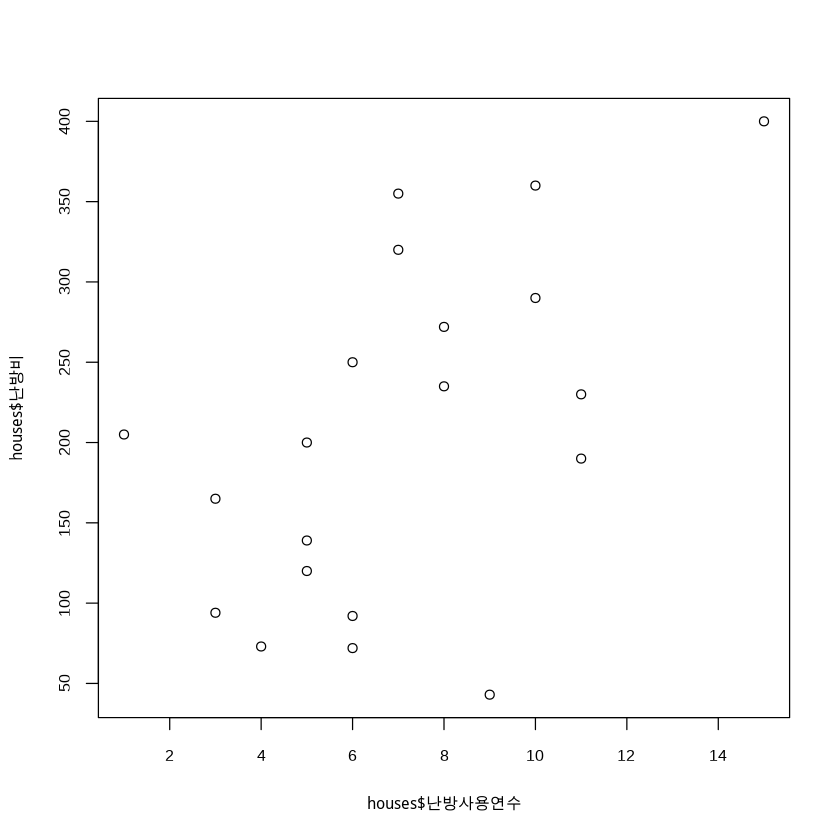

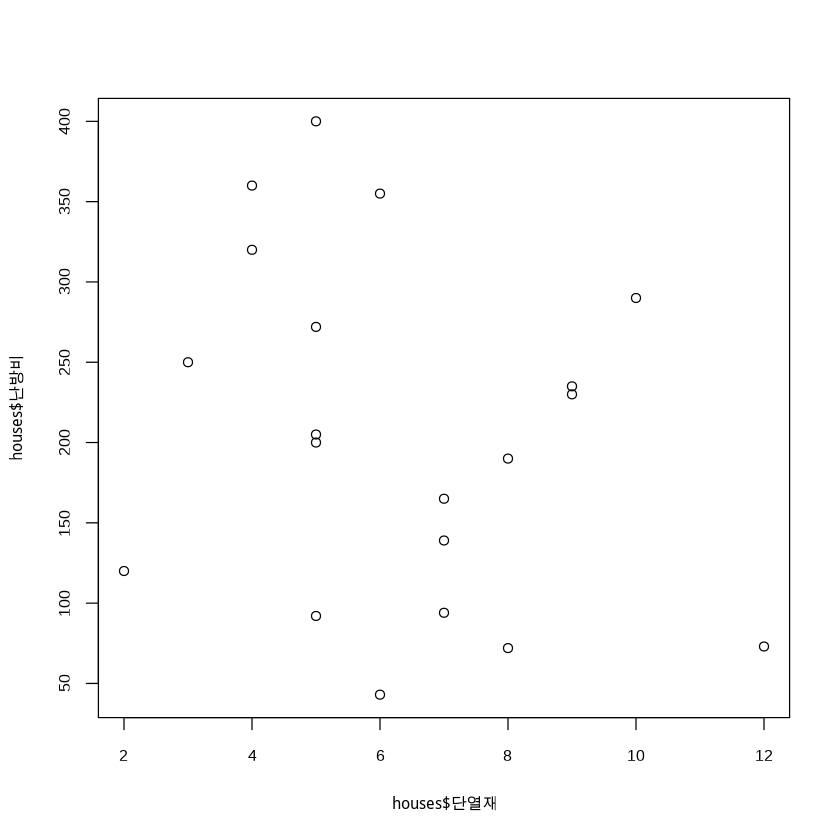

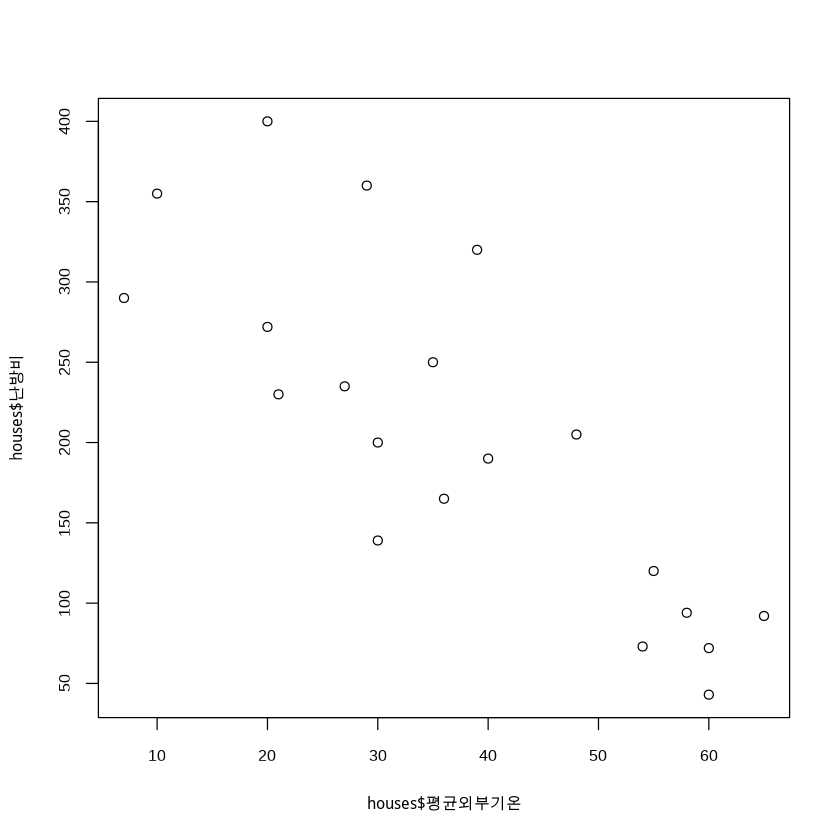

In [16]:
#산점도 
plot(houses$`난방사용연수`, houses$`난방비`)  #난방기의 사용 연수가 오래될수록 난방비가 많이 나올 것. 
plot(houses$`단열재`, houses$`난방비`) 
plot(houses$`평균외부기온`, houses$`난방비`) #평균 온도가 높아지면 난방비가 낮아질 것

#세로로 길게 나오기 때문에 한 눈에 보기는 쉽지 않음. 

#한글이 깨져서 나옴. - 한글이 제대로 나오게 설정 



In [17]:
#코랩에서 한글 출력하기
install.packages('showtext')
library(showtext)
font_add_google('Nanum Gothic', 'ng')
showtext_auto()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,난방비,평균외부기온,단열재,난방사용연수
난방비,1.0000000,-0.8115088,-0.2571013,0.5367276
평균외부기온,-0.8115088,1.0000000,-0.1030161,-0.4859877
단열재,-0.2571013,-0.1030161,1.0000000,0.0636174
난방사용연수,0.5367276,-0.4859877,0.0636174,1.0000000


[1] 0.5367276

[1] -0.2571013

[1] -0.8115088

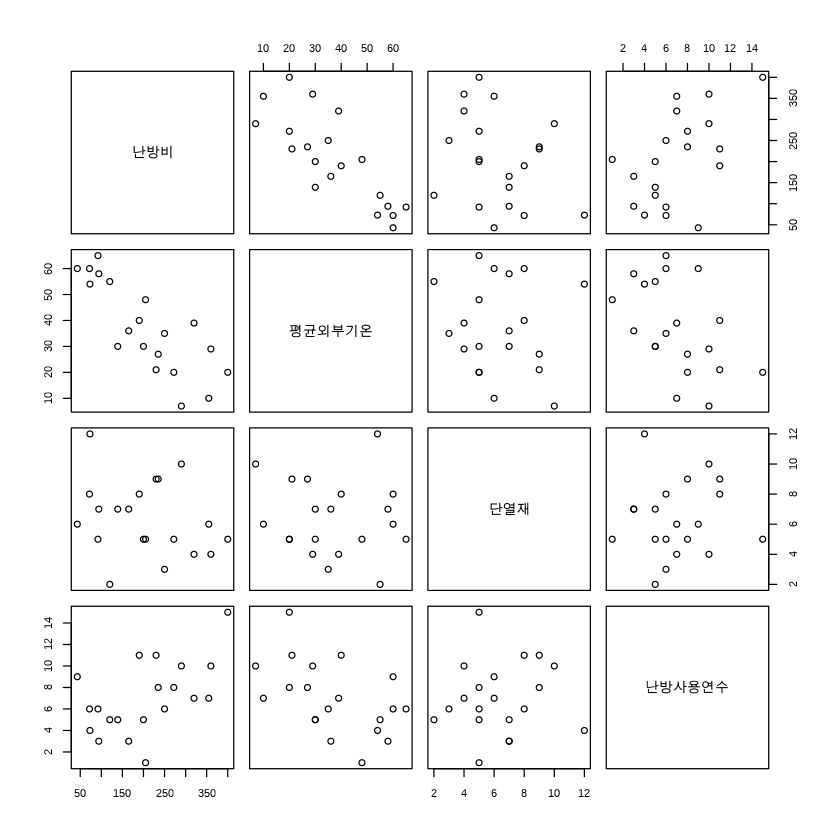

In [21]:
#산점도 행렬
plot(houses)   

#상관계수
cor(houses)

cor(houses$`난방사용연수`, houses$`난방비`)  
cor(houses$`단열재`, houses$`난방비`) 
cor(houses$`평균외부기온`, houses$`난방비`)

#상관계수 행렬 


The following objects are masked from houses (pos = 3):

    난방비, 난방사용연수, 단열재, 평균외부기온


The following objects are masked from houses (pos = 4):

    난방비, 난방사용연수, 단열재, 평균외부기온


The following objects are masked from houses (pos = 5):

    난방비, 난방사용연수, 단열재, 평균외부기온


The following objects are masked from houses (pos = 6):

    난방비, 난방사용연수, 단열재, 평균외부기온




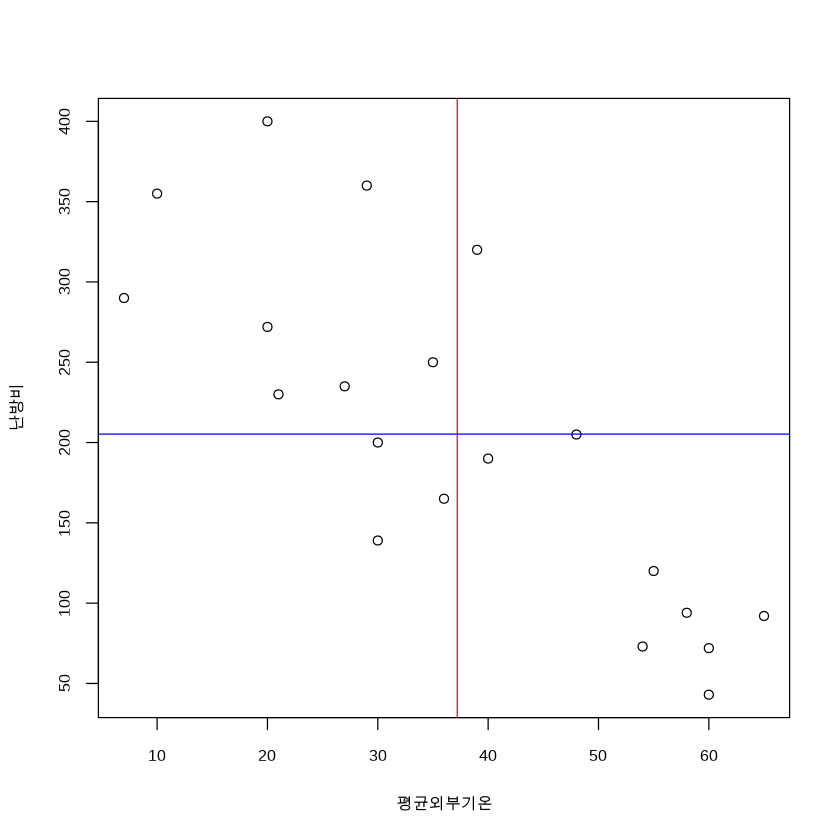

In [44]:
attach(houses)
plot(평균외부기온, 난방비)


abline(v=mean(평균외부기온), col='red')
abline(h=mean(난방비), col='blue')




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



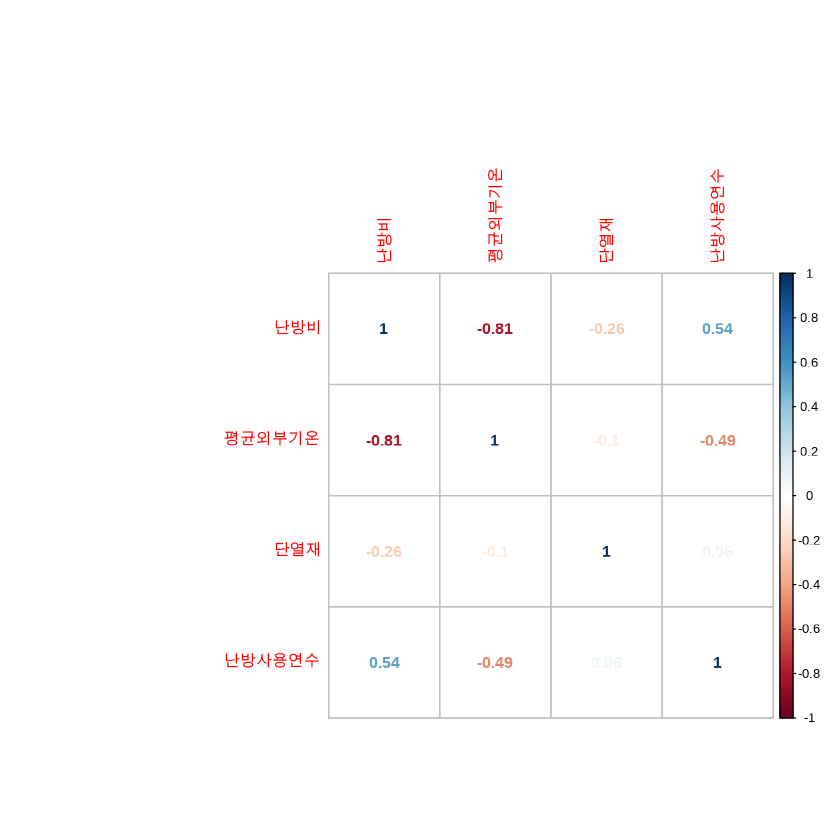

In [27]:
#히트맵으로 상관계수 확인 (시각적으로 색깔로 보이는 방법 - 생각보다 깔끔하게 보이지는 않는 듯)
install.packages('corrplot')
library(corrplot)

cp<- cor(houses)
corrplot(cp, method='number')
corrplot(cp, method='ellipse')




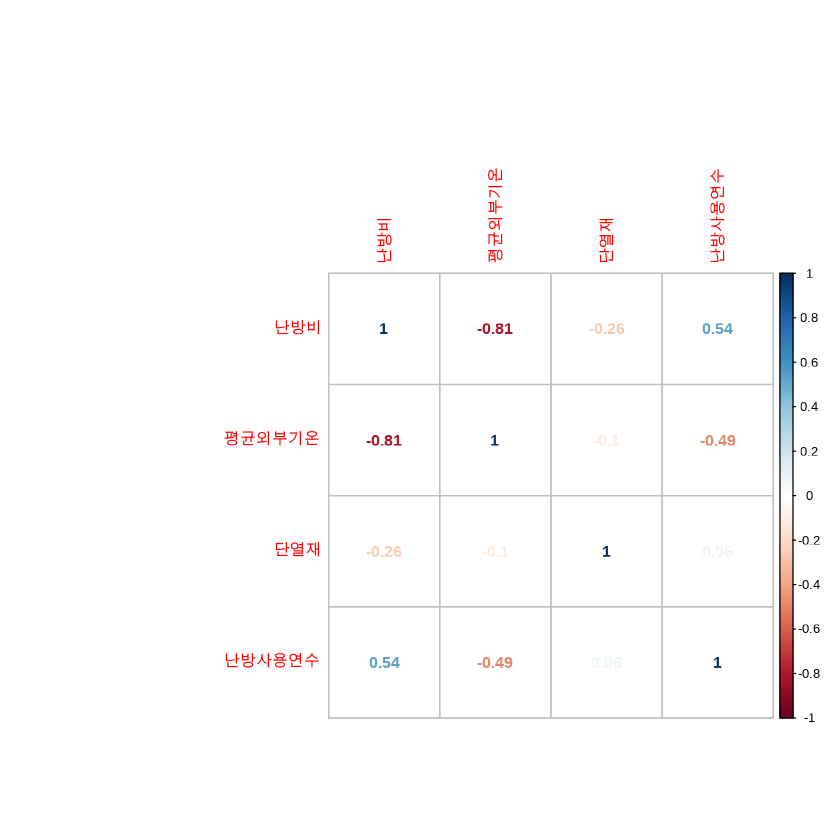

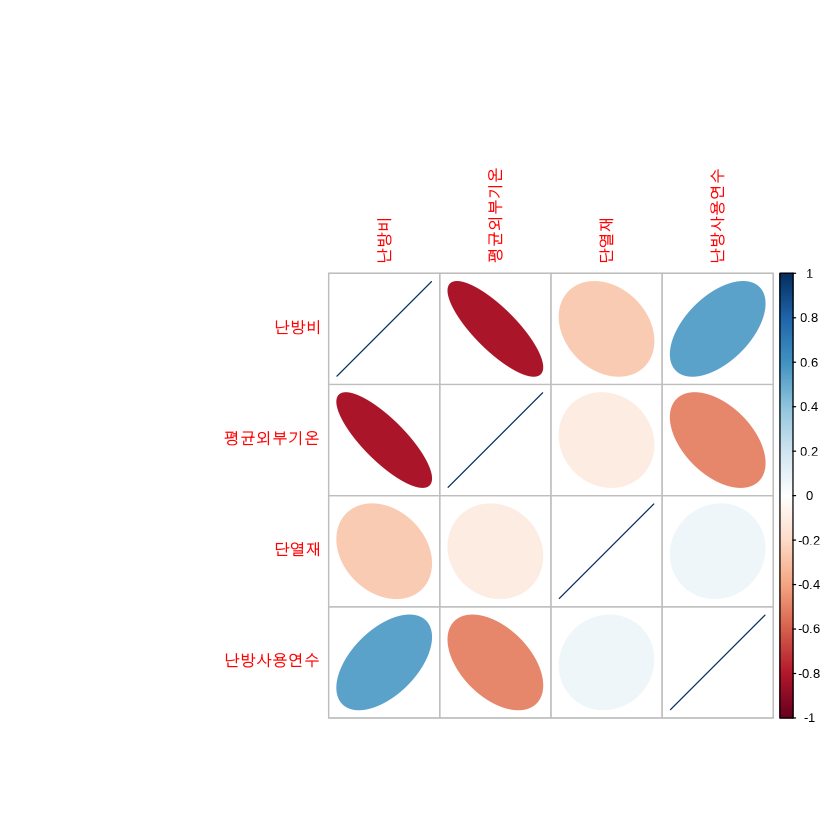

In [28]:
cp<- cor(houses)
corrplot(cp, method='number')   
corrplot(cp, method='ellipse')

#단일회귀분석
lm(종속변수 ~ 독립변수)

#다중회귀분석
lm(종속변수 ~ 독립변수 1 + 독립변수 2 + 독립변수 3+... )

#변수가 3개이상일 경우 - 하나하나 작성하기 불편함 
lm(종속변수 ~. 나머지 독립변수 작성 )


In [30]:
#난방비에 대한 다중회귀분석 
lm(houses$난방비 ~ houses$평균외부기온 + houses$단열재 + houses$난방사용연수)

model1 <- lm(houses$난방비 ~ houses$평균외부기온 + houses$단열재 + houses$난방사용연수)

summary(model1)

#난방비에 대해서 한다는 것. 
이걸 내가 가지고 있는 데이터에 어떻게 적용할 수 있을까? 
이런 것 - vat를 설명하는데 성별, 나이, 몸무게, 지방량, 근육량 이런 것들을 다 넣는 것. 
(사실 이 방법은 BMI가 VAT를 계산하는데 사용하는 방법일 것. )
하지만 생각보다 내가 회귀분석을 이렇게 무엇인가를 predict하고 modeling하는데 사용할 일은 많이 없다고 봄 

그렇다면 언제 회귀분석을 사용할 수 있을까?

MF, CR 논문 - MF와 CR을 가지고 health risk를 구했던 것. 
INS30로 weight gain 예측 논문. 

사실, 회귀분석이라는 것은 다른 독립변수들을 가지고 종속변수를 설명하고 싶어하는 것. 
다른 독립변수들을 가지고 있는데 종속변수의 값이 standard가 아닐 경우, 독립변수들을 활용해서 
종속변수를 알고 싶음. 독립변수와 종속변수가 다이렉트로 연결되는 관계라면 회귀분석을 돌릴 필요가 없을 것. 

인슐린 저항성과 관련해서 회귀분석을 돌릴 필요가 있을까? 









Call:
lm(formula = houses$난방비 ~ houses$평균외부기온 + houses$단열재 + 
    houses$난방사용연수)

Coefficients:
        (Intercept)  houses$평균외부기온        houses$단열재  
            427.194               -4.583              -14.831  
houses$난방사용연수  
              6.101  



Call:
lm(formula = houses$난방비 ~ houses$평균외부기온 + houses$단열재 + 
    houses$난방사용연수)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.403 -35.492  -1.062  26.642  88.146 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         427.1938    59.6014   7.168 2.24e-06 ***
houses$평균외부기온  -4.5827     0.7723  -5.934 2.10e-05 ***
houses$단열재       -14.8309     4.7544  -3.119  0.00661 ** 
houses$난방사용연수   6.1010     4.0121   1.521  0.14786    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.05 on 16 degrees of freedom
Multiple R-squared:  0.8042,	Adjusted R-squared:  0.7675 
F-statistic:  21.9 on 3 and 16 DF,  p-value: 6.562e-06


In [36]:
#난방비에 대한 다중회귀분석 

attach(houses)   #houses를 제외하고 간략하게 작성하는 것. 
lm(난방비 ~ 평균외부기온 + 단열재 + 난방사용연수)

model1 <- lm(난방비 ~ 평균외부기온 + 단열재 + 난방사용연수)


summary(model1)

The following objects are masked from houses (pos = 3):

    난방비, 난방사용연수, 단열재, 평균외부기온





Call:
lm(formula = 난방비 ~ 평균외부기온 + 단열재 + 난방사용연수)

Coefficients:
 (Intercept)  평균외부기온        단열재  난방사용연수  
     427.194        -4.583       -14.831         6.101  



Call:
lm(formula = 난방비 ~ 평균외부기온 + 단열재 + 난방사용연수)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.403 -35.492  -1.062  26.642  88.146 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  427.1938    59.6014   7.168 2.24e-06 ***
평균외부기온  -4.5827     0.7723  -5.934 2.10e-05 ***
단열재       -14.8309     4.7544  -3.119  0.00661 ** 
난방사용연수   6.1010     4.0121   1.521  0.14786    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.05 on 16 degrees of freedom
Multiple R-squared:  0.8042,	Adjusted R-squared:  0.7675 
F-statistic:  21.9 on 3 and 16 DF,  p-value: 6.562e-06


Coefficients:
 (Intercept)  평균외부기온        단열재  난방사용연수  
     427.194        -4.583       -14.831         6.101  

     식으로 표현하면  y (난방비)= 427.2 + 6.1X1 - 14.8X2 - 4.6X3
     
회귀식 해석하기 
 
 난방기 연수가 1년씩 증가하면 난방비가 6.1만큼 증가 (단위가 천 원이라면 6100원 감소)  
 단열재 두께가 1CM씩 증가하면 난방비가 -14.8 만큼 감소 (-14800원)  
외부 기온이 1C씩 증가하면 난방비는 -4.6씩 감소(4600원) 

주택자체의 난방비는 절편 값인 427.2 만큼 소비가 됨

## 가장 먼저 봐야하는 값 (R 제곱)
Multiple R-squared:  0.8042,	Adjusted R-squared:  0.7675 

## 그 다음으로 보는 값 (P value)
p-value: 6.562e-06: 0.05보다 작으면 귀무가설을 기각하고 대립가설을 채택함

Coefficients:
             Estimate Std. Error t value Pr(>|t|)      
(Intercept)  427.1938    59.6014   7.168 2.24e-06 ***  
평균외부기온  -4.5827     0.7723  -5.934 2.10e-05 ***  
단열재       -14.8309     4.7544  -3.119  0.00661 **   
난방사용연수   6.1010     4.0121   1.521  0.14786       

summary(model1)
- 결정계수: 0.80 -> 각 독립변수로 종속의 변화를 설명할 수 있음.
- 회귀모형의 유의성 검정: p-value가 0.05보다 작음 -> 회귀모형의 회귀계수들의 값이 0이 아님. 
- 각 회귀계수의 유의성 검정: p-value가 0.05보다 작음-> 각 회귀계수의 값이 0이 아님. (0이라는 것은 이 독립변수가 한 단위 증가한다고 해도 종속변수에 큰 영향을 미치지 않는다는 것) 
- 최종적으로 난방비 회귀모형에서 단열재, 평균외부기온이 난방비를 설명할 수 있는 변인 
(최종적으로 난방비 산출시, 단열재, 평균외부기온이 많은 영향을 미침) 

$y (난방비)= 427.2 + 6.1x1 - 14.8x2 $









In [ ]:
# 어떤 은행에서 담보주택 분석을 위해 주택가격, 세대주 교육수준, 세대주연령, 원 상환액, 세대주 성별등이
# 가계소득 수준과 어떤 관련이 있는지 다중회귀분석을 실시 (bank.txt)

In [47]:
bank <- read.csv('https://raw.githubusercontent.com/yejin2020/r_statistics/master/datasets/banks.txt', header=T, sep='\t')

bank


Income,Value,Education,Age,Mortgage,Gender
<dbl>,<int>,<int>,<int>,<int>,<int>
100.7,190,14,53,230,1
99.0,121,15,49,370,1
102.0,161,14,44,397,1
100.7,161,14,39,181,1
100.0,179,14,53,378,0
95.2,99,14,46,304,0
101.0,114,15,42,285,1
101.8,202,14,49,551,0
102.0,184,13,37,370,0


,Income,Value,Education,Age,Mortgage,Gender
Income,1.0000000,0.7208946,0.1846682,0.24144867,0.11975509,0.4856123
Value,0.7208946,1.0000000,-0.1437159,0.21950397,0.35791533,0.1841029
Education,0.1846682,-0.1437159,1.0000000,0.62085779,-0.21029466,0.0619441
Age,0.2414487,0.2195040,0.6208578,1.00000000,-0.03789563,0.1557777
Mortgage,0.1197551,0.3579153,-0.2102947,-0.03789563,1.00000000,-0.1289500
Gender,0.4856123,0.1841029,0.0619441,0.15577767,-0.12895002,1.0000000


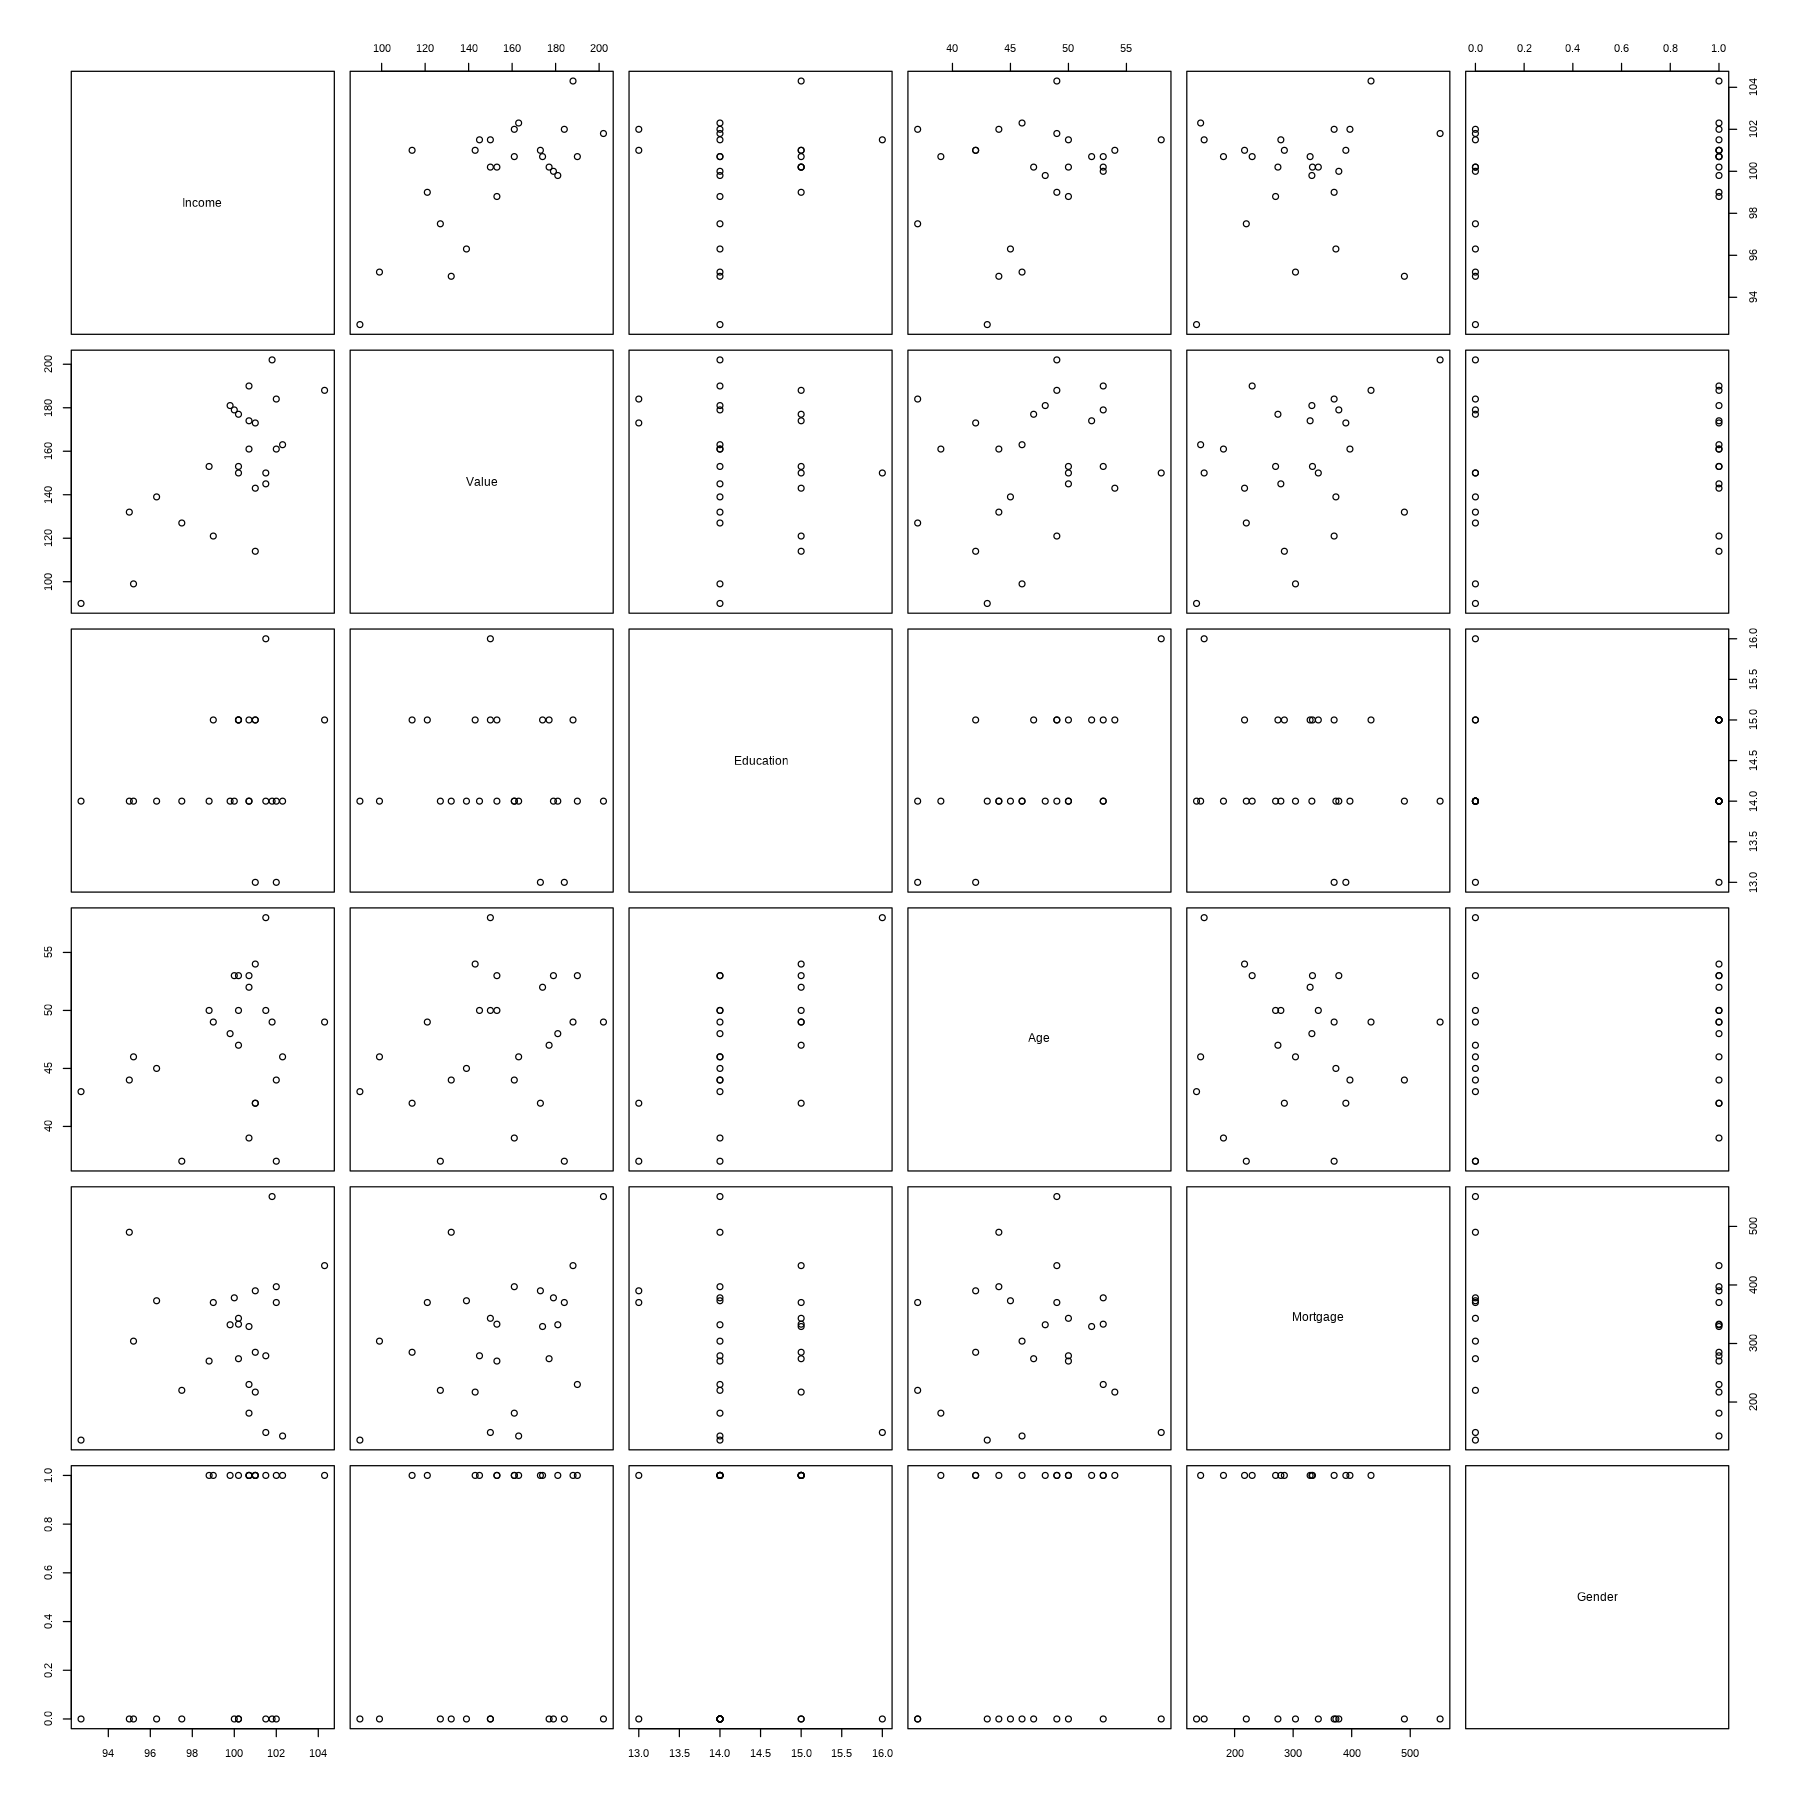

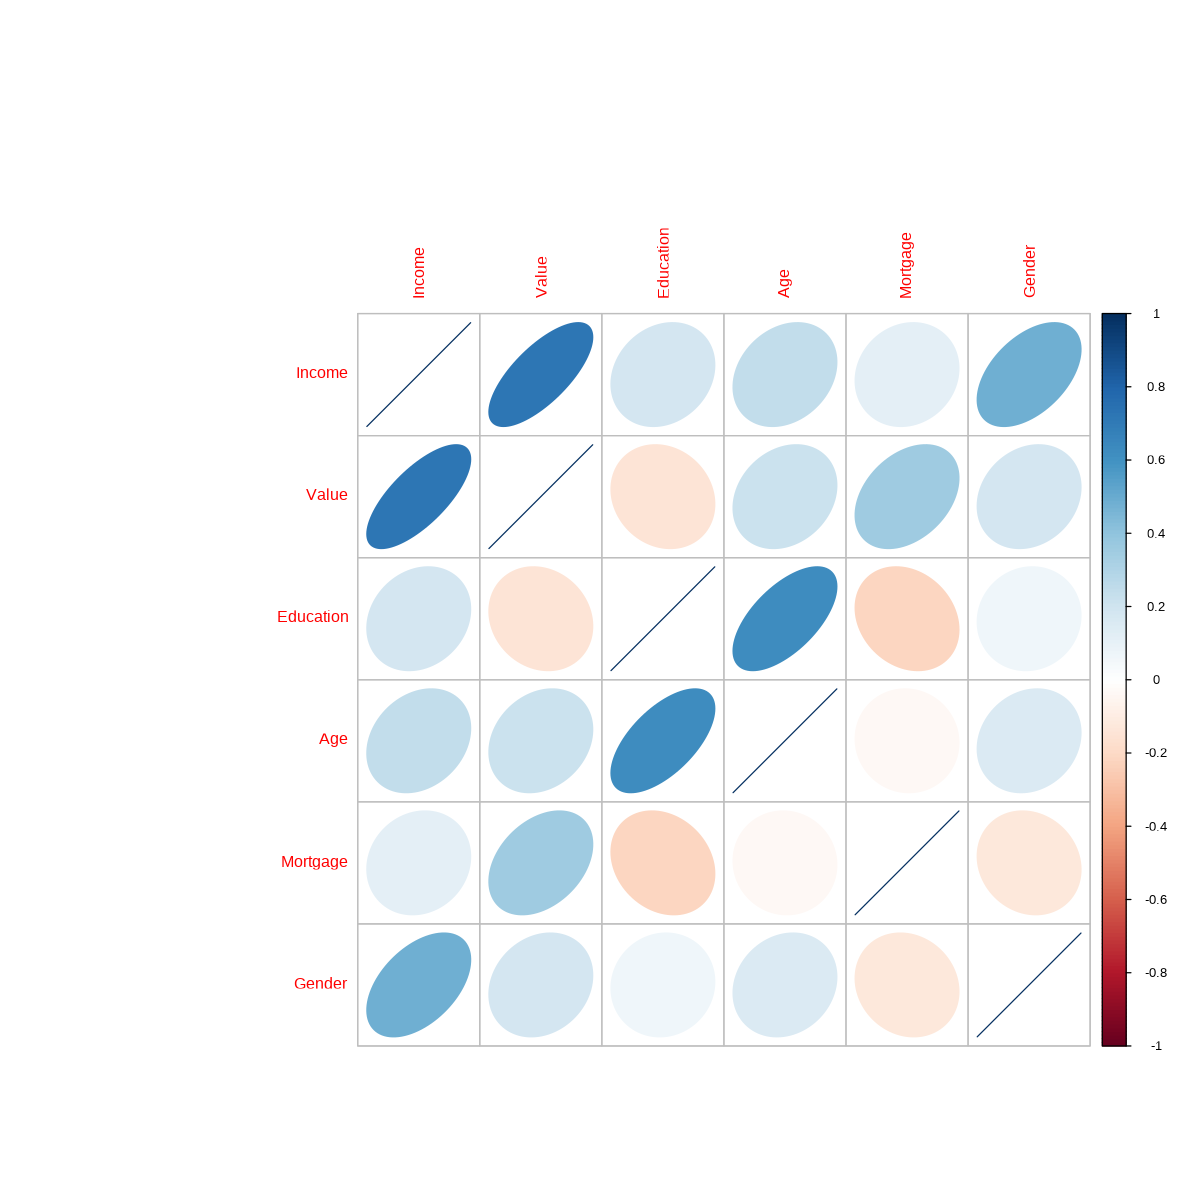

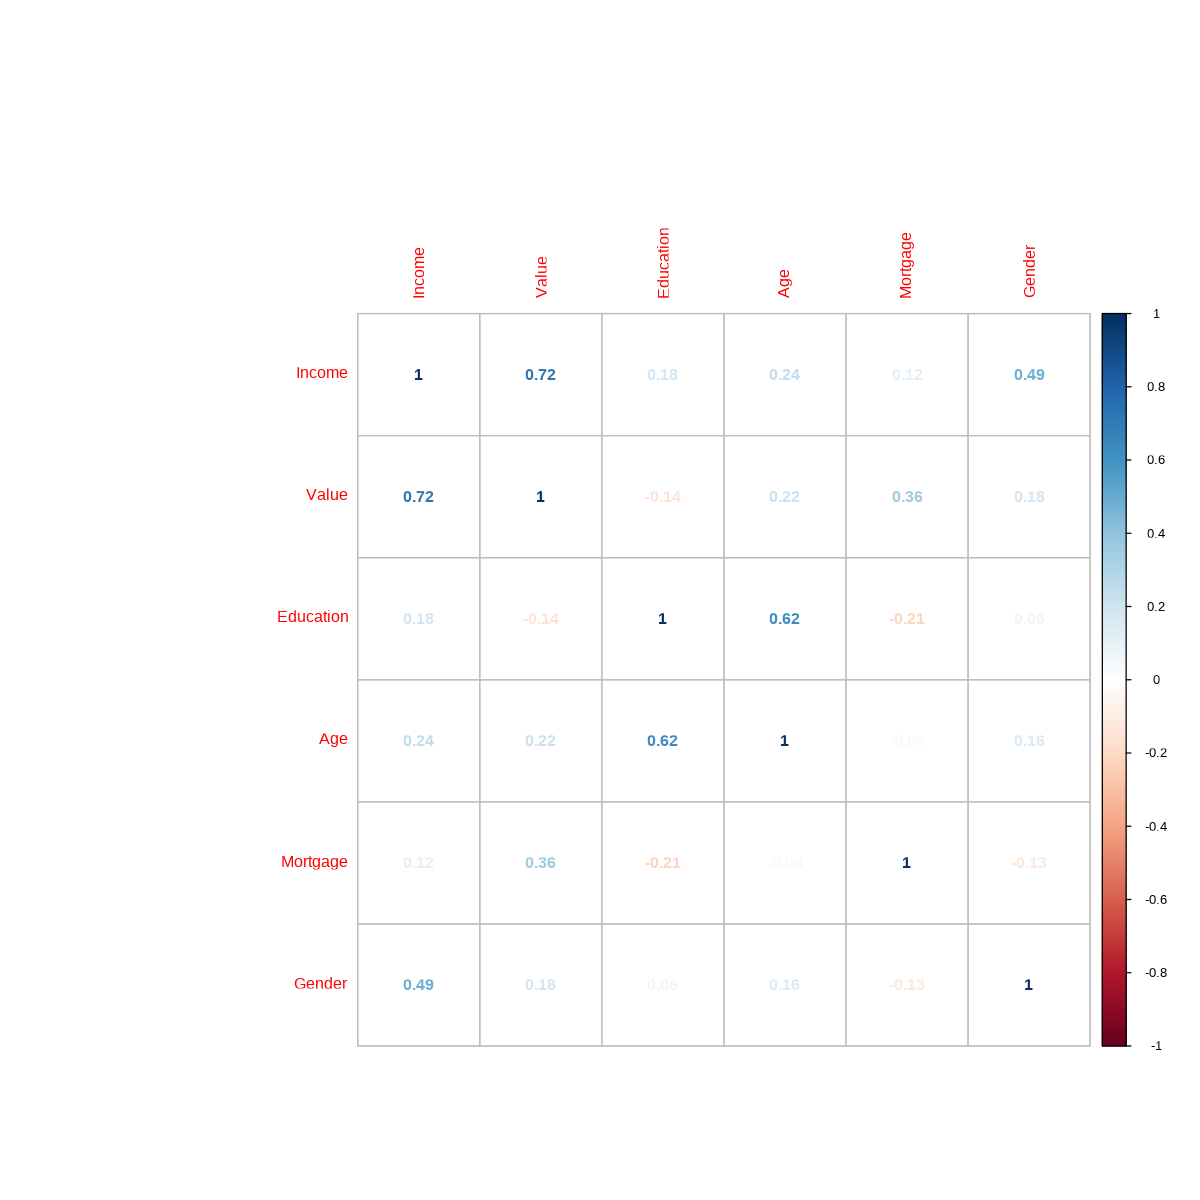

In [58]:
cor(bank)

plot(bank)  # plot으로 보는데 원하는 몇 개만 선택해서 보는 방법은? 

#상관분석 산점도를 키우는 방법 (width와 height를 조절하면 됨)
options(repr.plot.width=10, repr.plot.height=10)


cp <- cor(bank)
corrplot(cp, method='ellipse')
corrplot(cp, method='number')

In [51]:
model2 <- lm(bank$Income ~ bank$Value + bank$Education + bank$Age + bank$Mortgage + bank$Gender)

summary(model2)




Call:
lm(formula = bank$Income ~ bank$Value + bank$Education + bank$Age + 
    bank$Mortgage + bank$Gender)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1236 -1.1184  0.4728  0.9584  2.3578 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    70.6483026  7.5013154   9.418 1.37e-08 ***
bank$Value      0.0718329  0.0124864   5.753 1.52e-05 ***
bank$Education  1.6159743  0.6060901   2.666  0.01526 *  
bank$Age       -0.1221059  0.0785276  -1.555  0.13646    
bank$Mortgage  -0.0009212  0.0031880  -0.289  0.77575    
bank$Gender     1.8167604  0.6259073   2.903  0.00913 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.485 on 19 degrees of freedom
Multiple R-squared:  0.7491,	Adjusted R-squared:  0.6831 
F-statistic: 11.34 on 5 and 19 DF,  p-value: 3.556e-05


###Multiple R-squared:  0.7491,	Adjusted R-squared:  0.6831 (결정력: 68%)

###F-statistic: 11.34 on 5 and 19 DF,  p-value: 3.556e-05
-> p 값이 0.05보다 작기 때문에 모델이 유의하다고 할 수 있음.   

회귀모형의 유의성은 유의하다고 볼 수 있고, 회귀계수에 대한 유의성은 value, education, gender에서 유의하다고 할 수 있음. 


Coefficients:     Estimate Std.  Error t  value  Pr(>|t|)      
(Intercept)    70.6483026  7.5013154   9.418 1.37e-08 ***    
bank$Value      0.0718329  0.0124864   5.753 1.52e-05 *** 

bank$Education  1.6159743  0.6060901   2.666  0.01526 *

bank$Age       -0.1221059  0.0785276  -1.555  0.13646

bank$Mortgage  -0.0009212  0.0031880  -0.289  0.77575
        
bank$Gender     1.8167604  0.6259073   2.903  0.00913 ** 

$y= 70.7 +0.07x1 +1.6x2 +1.8x3$

(남자, 여자일 때의 차이가 1.8) 




In [53]:
model3 <- lm(bank$Income ~ bank$Value + bank$Education + bank$Gender)

summary(model3)


Call:
lm(formula = bank$Income ~ bank$Value + bank$Education + bank$Gender)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1967 -1.2467  0.1996  0.9461  2.5958 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    74.60001    6.89513  10.819 4.80e-10 ***
bank$Value      0.06366    0.01096   5.809 9.13e-06 ***
bank$Education  1.00702    0.45082   2.234  0.03651 *  
bank$Gender     1.77640    0.61856   2.872  0.00913 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.503 on 21 degrees of freedom
Multiple R-squared:  0.7161,	Adjusted R-squared:  0.6755 
F-statistic: 17.65 on 3 and 21 DF,  p-value: 5.913e-06


In [62]:
#독립변수 전체를 넣어서 회귀분석을 돌릴 때, 각각의 변수를 작성하지 않고 한 번에 넣는 방법 
# 새로 할당할 이름 <- lm(종속변인~., data = 데이터이름)

m <- lm(Income~., data=bank)
m
summary(m)



Call:
lm(formula = Income ~ ., data = bank)

Coefficients:
(Intercept)        Value    Education          Age     Mortgage       Gender  
 70.6483026    0.0718329    1.6159743   -0.1221059   -0.0009212    1.8167604  



Call:
lm(formula = Income ~ ., data = bank)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1236 -1.1184  0.4728  0.9584  2.3578 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 70.6483026  7.5013154   9.418 1.37e-08 ***
Value        0.0718329  0.0124864   5.753 1.52e-05 ***
Education    1.6159743  0.6060901   2.666  0.01526 *  
Age         -0.1221059  0.0785276  -1.555  0.13646    
Mortgage    -0.0009212  0.0031880  -0.289  0.77575    
Gender       1.8167604  0.6259073   2.903  0.00913 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.485 on 19 degrees of freedom
Multiple R-squared:  0.7491,	Adjusted R-squared:  0.6831 
F-statistic: 11.34 on 5 and 19 DF,  p-value: 3.556e-05


# 다중회귀분석 적합성 평가

이러한 회귀모형이 과연 적합한 것인지 의문!  
=> 회귀모형 작성시 적절한 필요조건을 만족하는지 알아봄

=> 회귀보형 적합성 그래프 작성: qq plot 

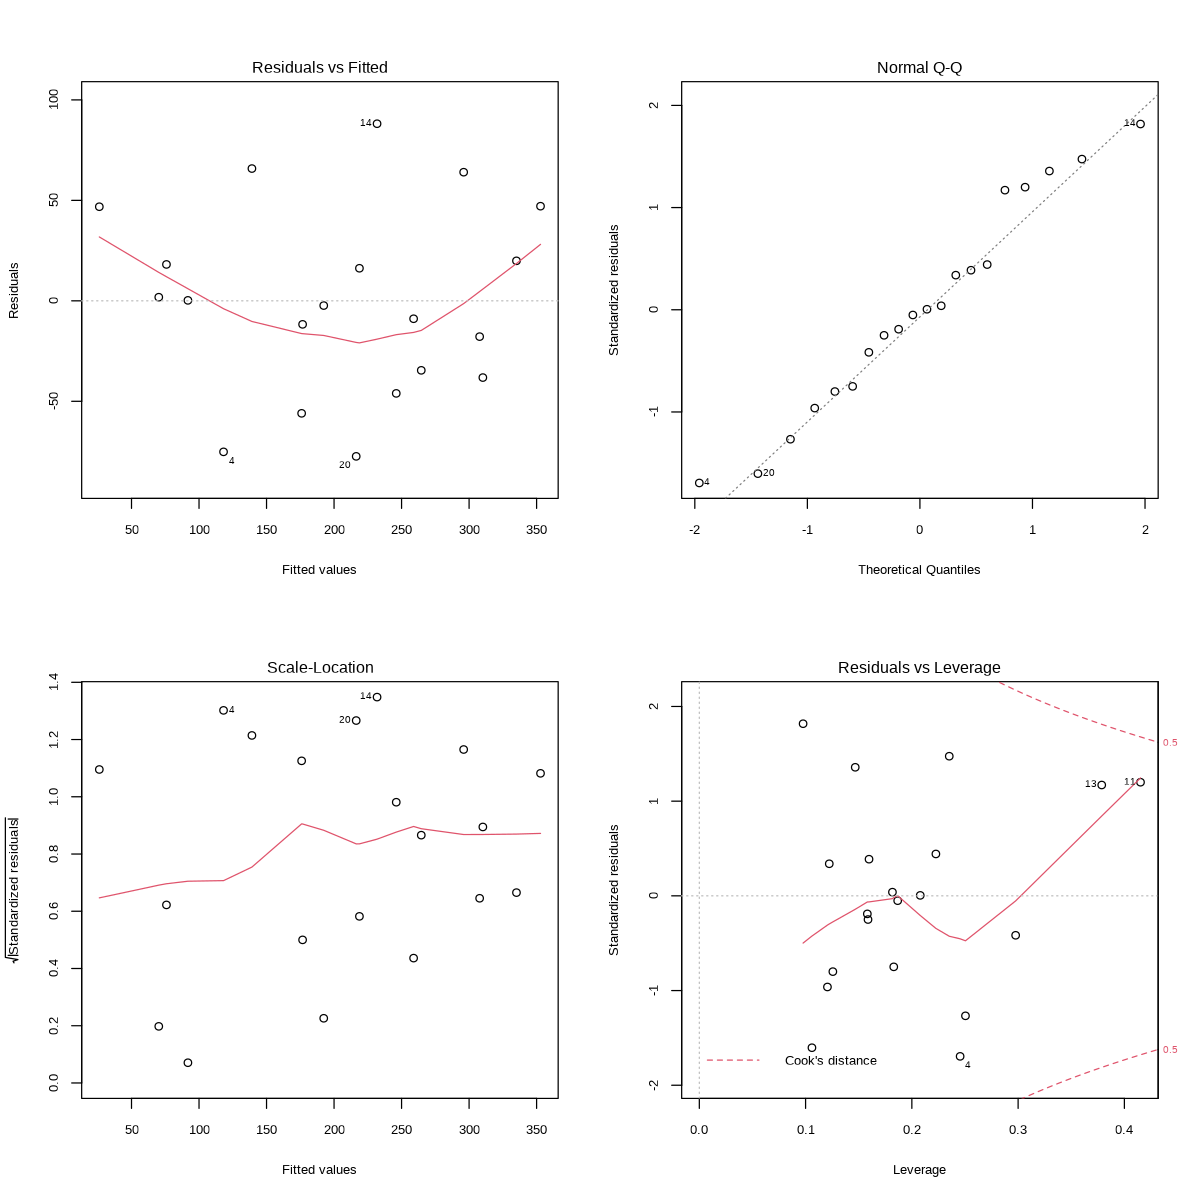

In [63]:
#난방비 다중 회귀보형에 대한 적합성 평가 

#2 x 2 그래프를 그리기 위해 설정 초기화 
.opar <- par(no.readonly=T)
par(mfrow=c(2,2))

plot(model1)

# 그래프- 시계방향으로 선형성, 정규성, 분산성, 독립성
# 선형성 : 되도록 평평하게 직선으로
예측값과 실측값의 차이를 보는 것. - 값이 크면 오차가 크다는 것. 오차가 일정하게 나오면 
예측을 할 수 있는데, 어떤 값은 오차가 크고 어떤 값은 오차가 작다면
예측하기가 어려움. 
(선형성을 띠지 않는다는 건, 상관관계가 뚜렷하게 나오지 않는 것. 그래프의 값들이 퍼져있음 )
# 정규성: 그래프가 선에 가깝게 위치해야함
(애매한 정도. 정규성을 띤다고 보기 애매)
# 분산성 - 잔차의 분산이 일정한지 
잔차를 표준화시켰을 때 분산을 보는 것. 
분산성 역시 일직선으로 평평하게 나오는 것이 좋음. 
평균에 가깝게 일정하게 나오는지, 일정하지 않은 값을 가지는지 알 수 있음. 
(일정하게 나오지는 않는 것처럼 보임)
# 독립성 
특정 값들 때문에 예측하는 것에 전체적인 수치를 파악하는데 방해가 됨
되도록이면 일직선에 가깝게 
(13,11 데이터가 이상치가 존재함)

일반적으로 위의 두 개의 그래프만 봐도 괜찮음. 





In [ ]:
# 닌빙비 회귀모형 적합성 분석결과 

난방사용연수 변수를 제외하고 나머지 계수들은 유의했지만 
몇몇 이상치 때문에 선형관계, 정규성, 독립성에 문제가 있는 것으로 보임. 

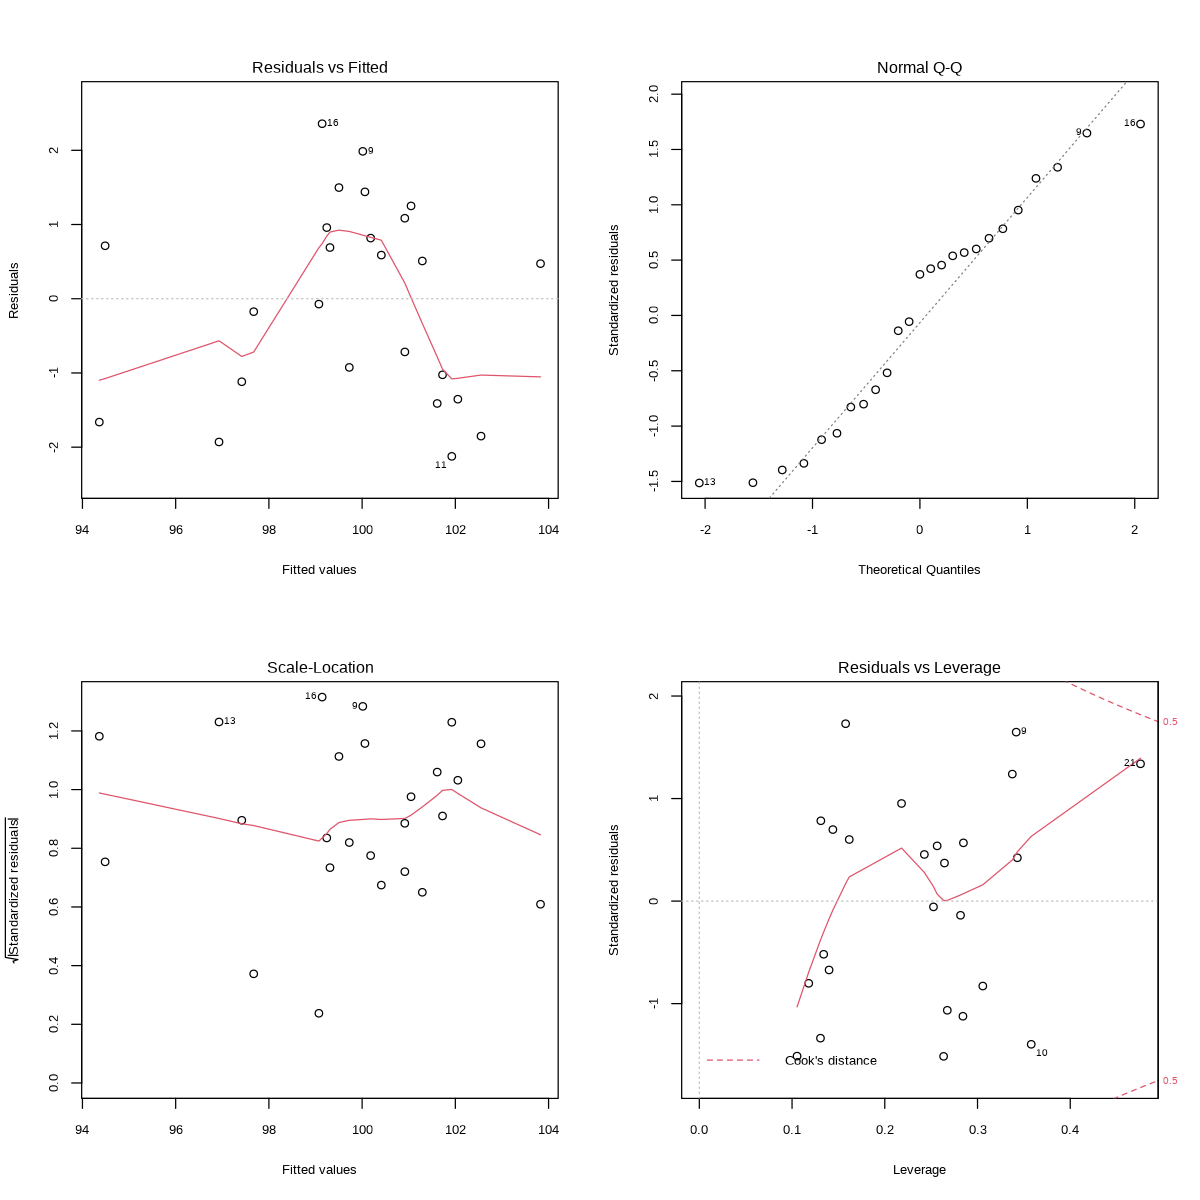

In [64]:
.opar <- par(no.readonly=T)
par(mfrow=c(2,2))

plot(model2)

# 몇몇 이상치 때문에 선형관계, 정규성, 독립성에 문제가 있는 것으로 보임. 

In [ ]:
#다중공선성
회귀분석시 종속변수와 독립변수간의 상관여부를 판단했었는데, 간혹 독립변수들끼리 서로 상관되는 경우가 발생. 
서로 비슷한 성격을 가지는 독립변수들이 존재하는 경우 주로 발생 
-> 다중공선성의 문제 

두 독립변수간의 상관계수가 -0.7 ~ 0.7 사이면 사용해도 좋음 

다중공선성의 여부를 파악하려면 팽창계수를 알아봐야 함
팽창계수가 10이상이면 해당 독립변수는 제외시킴
R에서는 vif 함수를 이용해서 팽창계수를 알아봄. 



In [2]:
#시멘트가 굳어지며 발생하는 열의 양에 영향을 미치는 4가지 성분에 대한 회귀분석 실시 (cement.txt)

x1 <- c(7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10)
x2 <- c(26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68)
x3 <- c(6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8)
x4 <- c(60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12)

y <- c(78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 
        72.5, 93.1, 115.9, 83.8, 113.3, 109.4)

cement <- data.frame(y,x1,x2,x3,x4)

cement

y,x1,x2,x3,x4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
78.5,7,26,6,60
74.3,1,29,15,52
104.3,11,56,8,20
87.6,11,31,8,47
95.9,7,52,6,33
109.2,11,55,9,22
102.7,3,71,17,6
72.5,1,31,22,44
93.1,2,54,18,22


,y,x1,x2,x3,x4
y,1.0000000,0.7307175,0.8162526,-0.5346707,-0.8213050
x1,0.7307175,1.0000000,0.2285795,-0.8241338,-0.2454451
x2,0.8162526,0.2285795,1.0000000,-0.1392424,-0.9729550
x3,-0.5346707,-0.8241338,-0.1392424,1.0000000,0.0295370
x4,-0.8213050,-0.2454451,-0.9729550,0.0295370,1.0000000


ERROR: ignored

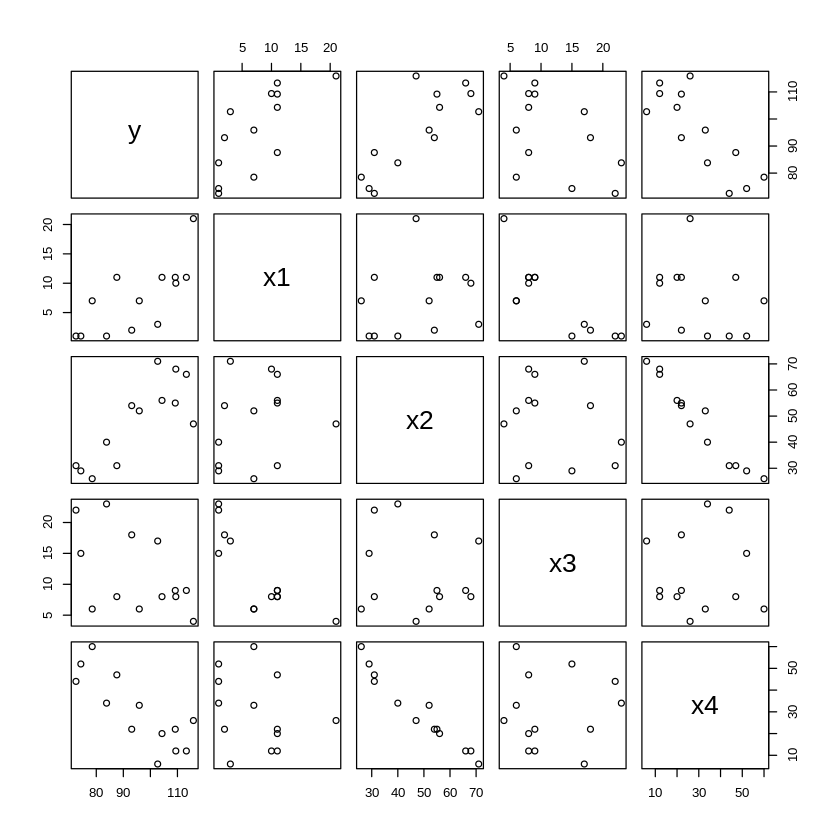

In [34]:
plot(cement)
cor(cement) 

model3 <- lm(y,.data=cement)

.opar <- par(no.readonly=T)
par(mfrow=c(2,2))
plot(model3)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



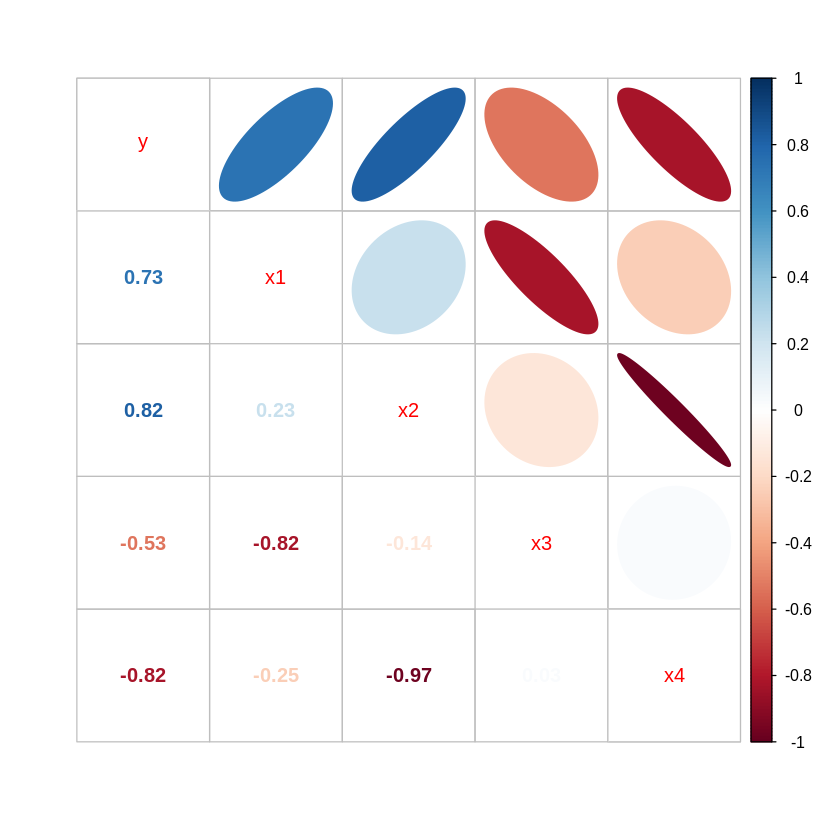

In [41]:
install.packages('corrplot')
library(corrplot)

cp <- cor(cement)
corrplot.mixed(cp, upper='ellipse', lower='number')

In [81]:
model3 <- lm(y~.,data=cement)
summary(model3)

#독립변수들간의 관계가 커서 독립변수와 종속변수와의 관계를 상쇄시킴. 

#회귀모형 분석
결정계수: 0.9736
회귀모형 유의성: 0.05보다 작음
회귀계수 유의성: 0.05보다 큼 
=> 결정계수는 높지만, 회귀계수의 유의성은 없음
=> 다중공선성 때문에 발생
=> vif 함수로 팽창계수 확인


Call:
lm(formula = y ~ ., data = cement)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
x1            1.5511     0.7448   2.083   0.0708 .
x2            0.5102     0.7238   0.705   0.5009  
x3            0.1019     0.7547   0.135   0.8959  
x4           -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


In [5]:
install.packages('car')
library(car)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘conquer’, ‘openxlsx’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


Loading required package: carData



In [6]:
vif(cement)

ERROR: ignored

In [35]:

cp<-cor(cement) 
corrplot(cp, method='number')

ERROR: ignored

In [3]:
#vif(m2)
# x1, x3은 x2, x4에 비해 팽창계수가 작으므로 x2, x4를 제외하고 다시 회귀모형을 생성 

#재생성한 회귀모형 분석

m3 <- lm(y~x1+x3, data= cement)
summary(m3)



Call:
lm(formula = y ~ x1 + x3, data = cement)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.142  -7.779   2.558   7.226  15.008 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  72.3490    17.0528   4.243  0.00171 **
x1            2.3125     0.9598   2.409  0.03672 * 
x3            0.4945     0.8814   0.561  0.58717   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.08 on 10 degrees of freedom
Multiple R-squared:  0.5482,	Adjusted R-squared:  0.4578 
F-statistic: 6.066 on 2 and 10 DF,  p-value: 0.01883


In [4]:

m4 <- lm(y~x1+x2, data= cement)
summary(m4)


m5 <- lm(y~x1+x4, data= cement)
summary(m4)


m6 <- lm(y~x2+x3, data= cement)
summary(m6)


m7 <- lm(y~x2+x4, data= cement)
summary(m7)


m8 <- lm(y~x3+x4, data= cement)
summary(m8)


Call:
lm(formula = y ~ x1 + x2, data = cement)

Residuals:
   Min     1Q Median     3Q    Max 
-2.893 -1.574 -1.302  1.363  4.048 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 52.57735    2.28617   23.00 5.46e-10 ***
x1           1.46831    0.12130   12.11 2.69e-07 ***
x2           0.66225    0.04585   14.44 5.03e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.406 on 10 degrees of freedom
Multiple R-squared:  0.9787,	Adjusted R-squared:  0.9744 
F-statistic: 229.5 on 2 and 10 DF,  p-value: 4.407e-09



Call:
lm(formula = y ~ x1 + x2, data = cement)

Residuals:
   Min     1Q Median     3Q    Max 
-2.893 -1.574 -1.302  1.363  4.048 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 52.57735    2.28617   23.00 5.46e-10 ***
x1           1.46831    0.12130   12.11 2.69e-07 ***
x2           0.66225    0.04585   14.44 5.03e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.406 on 10 degrees of freedom
Multiple R-squared:  0.9787,	Adjusted R-squared:  0.9744 
F-statistic: 229.5 on 2 and 10 DF,  p-value: 4.407e-09



Call:
lm(formula = y ~ x2 + x3, data = cement)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1535 -4.1565 -0.3155  2.0330 13.4864 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  72.0747     7.3834   9.762 1.98e-06 ***
x2            0.7313     0.1207   6.057 0.000123 ***
x3           -1.0084     0.2934  -3.437 0.006358 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.445 on 10 degrees of freedom
Multiple R-squared:  0.847,	Adjusted R-squared:  0.8164 
F-statistic: 27.69 on 2 and 10 DF,  p-value: 8.377e-05



Call:
lm(formula = y ~ x2 + x4, data = cement)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.193  -7.260   0.652   4.104  19.008 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  94.1601    56.6271   1.663    0.127
x2            0.3109     0.7486   0.415    0.687
x4           -0.4569     0.6960  -0.657    0.526

Residual standard error: 9.321 on 10 degrees of freedom
Multiple R-squared:  0.6801,	Adjusted R-squared:  0.6161 
F-statistic: 10.63 on 2 and 10 DF,  p-value: 0.003352



Call:
lm(formula = y ~ x3 + x4, data = cement)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2715 -2.8916 -0.6439  1.5115  8.2566 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 131.28241    3.27477  40.089 2.23e-12 ***
x3           -1.19985    0.18902  -6.348 8.38e-05 ***
x4           -0.72460    0.07233 -10.018 1.56e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.192 on 10 degrees of freedom
Multiple R-squared:  0.9353,	Adjusted R-squared:  0.9223 
F-statistic: 72.27 on 2 and 10 DF,  p-value: 1.135e-06


In [ ]:
#결론: 다중공선성을 최소로 하는 변수들만 선택해서 분석하는 것이 회귀모형의 유의성을 보장하는데 도움이 됨. 

#독립변수 최적화
독립변수가 많을 때 유의한 계수는 포함시키고, 유의하지 않은 변수는 제외시켜 작성한 회귀방정식은 간단해지고 이해하기도 쉬워짐

다중회귀식에 포함할 수 있는 독립변수들을 효과적으로 선별할 수 있는 분석방법
=> 단계적 회귀법, 단계적 변수 선택법
=> 전진소거법, 후진소거법, 최적소거법

전진소거법: 중요도가 높은 변수를 하나씩 추가해가며 회귀식 작성 
후진소거법: 중요도가 낮은 변수를 하나씩 제거해가며 회귀식 작성
최적소거법: 전진/후진 소거법을 적절히 조합해서 회귀식 작성 
소거법을 이용해서 만들어진 회귀모형에 대한 성능평가는 AIC를 이용함. 
AIC: akaike information criterion 
AIC 값이 작을수록 적절한 모형임을 의미함.
(AIC의 차이가 크지 않다면, 변수를 빼는 방향으로 가는 것.)


R에서는 step함수를 이용해서 소거법을 적용할 수 있음. 
step(회귀모델, 변수범위, 소거종류)


In [10]:
#난방비 회귀모형을 위해 단계적 회귀법을 이용해서 적절한 회귀방정식을 작성. 

#전진소거법
step(lm(난방비~1, data=houses), scope=list(lower=~1, upper=~평균외부기온+단열재+난방사용연수), direction='forward' )

-> 난방비 ~ 평균외부기온 + 단열재 (AIC:161.55)


Start:  AIC=187.46
난방비 ~ 1

               Df Sum of Sq    RSS    AIC
+ 평균외부기온  1    140215  72701 167.97
+ 난방사용연수  1     61336 151580 182.66
<none>                      212916 187.46
+ 단열재        1     14074 198842 188.09

Step:  AIC=167.97
난방비 ~ 평균외부기온

               Df Sum of Sq   RSS    AIC
+ 단열재        1   24979.6 47721 161.55
<none>                      72701 167.97
+ 난방사용연수  1    5648.1 67053 168.35

Step:  AIC=161.55
난방비 ~ 평균외부기온 + 단열재

               Df Sum of Sq   RSS    AIC
+ 난방사용연수  1      6026 41695 160.85
<none>                      47721 161.55

Step:  AIC=160.85
난방비 ~ 평균외부기온 + 단열재 + 난방사용연수




Call:
lm(formula = 난방비 ~ 평균외부기온 + 단열재 + 난방사용연수, 
    data = houses)

Coefficients:
 (Intercept)  평균외부기온        단열재  난방사용연수  
     427.194        -4.583       -14.831         6.101  


In [12]:
# 후진소거범

step(lm(난방비~., data=houses), direction='backward') #전부다 집어넣는 것이 시작이기 때문에 .을 찍음


Start:  AIC=160.85
난방비 ~ 평균외부기온 + 단열재 + 난방사용연수

               Df Sum of Sq    RSS    AIC
<none>                       41695 160.85
- 난방사용연수  1      6026  47721 161.55
- 단열재        1     25357  67053 168.35
- 평균외부기온  1     91751 133446 182.11



Call:
lm(formula = 난방비 ~ 평균외부기온 + 단열재 + 난방사용연수, 
    data = houses)

Coefficients:
 (Intercept)  평균외부기온        단열재  난방사용연수  
     427.194        -4.583       -14.831         6.101  


In [13]:
#최적소거법 - 경우의 수를 다 보여줌. 

step(lm(난방비~1, data=houses), scope=list(upper=~평균외부기온+단열재+난방사용연수), direction='both' )

#전진소거법에서 lower만 제외, 그리고 direction='both'


Start:  AIC=187.46
난방비 ~ 1

               Df Sum of Sq    RSS    AIC
+ 평균외부기온  1    140215  72701 167.97
+ 난방사용연수  1     61336 151580 182.66
<none>                      212916 187.46
+ 단열재        1     14074 198842 188.09

Step:  AIC=167.97
난방비 ~ 평균외부기온

               Df Sum of Sq    RSS    AIC
+ 단열재        1     24980  47721 161.55
<none>                       72701 167.97
+ 난방사용연수  1      5648  67053 168.35
- 평균외부기온  1    140215 212916 187.46

Step:  AIC=161.55
난방비 ~ 평균외부기온 + 단열재

               Df Sum of Sq    RSS    AIC
+ 난방사용연수  1      6026  41695 160.85
<none>                       47721 161.55
- 단열재        1     24980  72701 167.97
- 평균외부기온  1    151121 198842 188.09

Step:  AIC=160.85
난방비 ~ 평균외부기온 + 단열재 + 난방사용연수

               Df Sum of Sq    RSS    AIC
<none>                       41695 160.85
- 난방사용연수  1      6026  47721 161.55
- 단열재        1     25357  67053 168.35
- 평균외부기온  1     91751 133446 182.11



Call:
lm(formula = 난방비 ~ 평균외부기온 + 단열재 + 난방사용연수, 
    data = houses)

Coefficients:
 (Intercept)  평균외부기온        단열재  난방사용연수  
     427.194        -4.583       -14.831         6.101  


In [15]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [16]:
# 보스톤 집값 예측 
#보스톤 외곽지역 집값과 그것들과 관련있는 여러 요소를 변수로 정의. 최종적으로 집값에 영향을 주는 요인은 무엇일까? 

library(MASS)
str(Boston)

# 범죄율, 단위면적당 거주주민수,
# 비상업지구 거주민, 강근처 주택여부, 오염도 비율,
# 공실비율, 노후주택 비율, 도로 접근성비율,
# 재산세 납부비율, 학생/교사 비율, 유색인종 비율,
# 하위계층 비율, 본인소유 주택가격




'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


ERROR: ignored

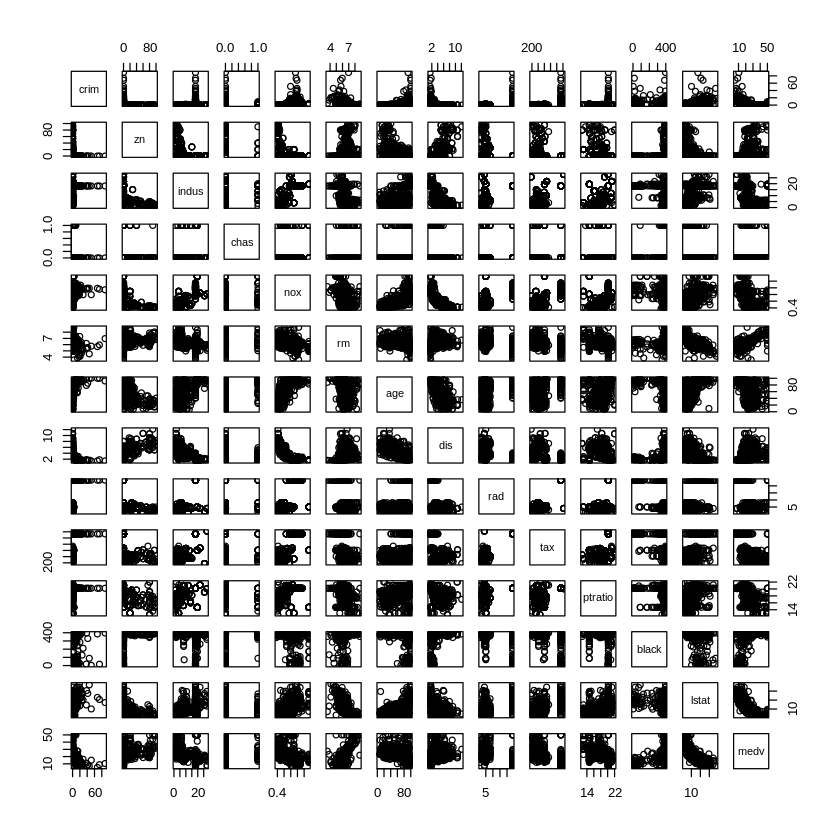

In [30]:
plot(Boston)

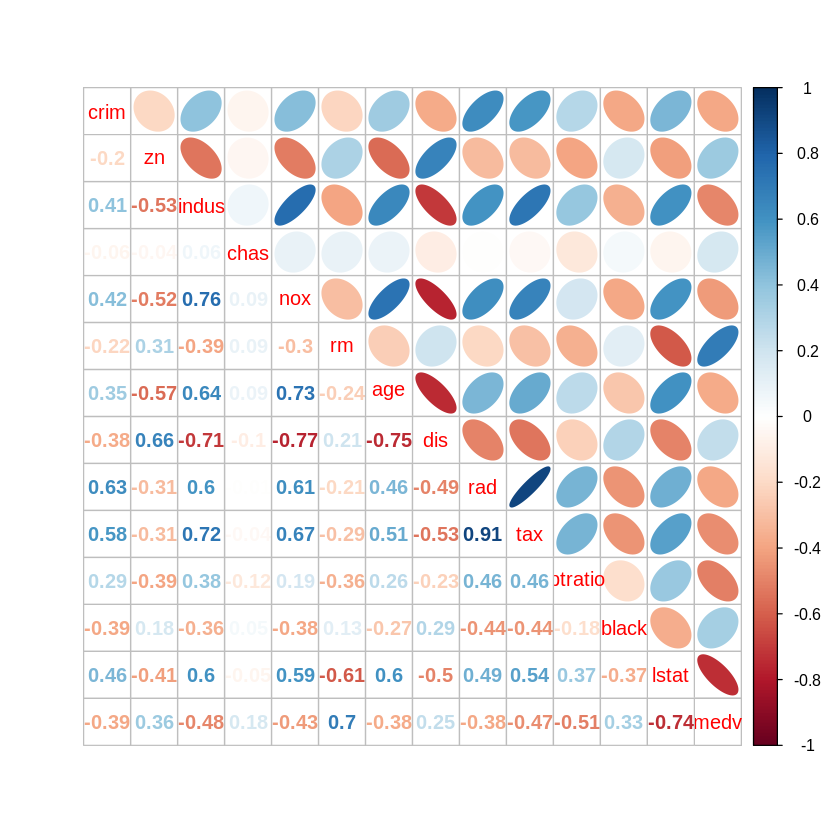

In [42]:
cp <- cor(Boston)
corrplot.mixed(cp, upper='ellipse', lower='number')

In [20]:
step(lm(Boston$medv~1, data=Boston), scope=list(upper=~crim+ zn+ indus+ chas+ nox+ rm+ age+ dis+ rad+ tax+ ptratio+ black+ lstat), direction='both' )


Start:  AIC=2246.51
Boston$medv ~ 1

          Df Sum of Sq   RSS    AIC
+ lstat    1   23243.9 19472 1851.0
+ rm       1   20654.4 22062 1914.2
+ ptratio  1   11014.3 31702 2097.6
+ indus    1    9995.2 32721 2113.6
+ tax      1    9377.3 33339 2123.1
+ nox      1    7800.1 34916 2146.5
+ crim     1    6440.8 36276 2165.8
+ rad      1    6221.1 36495 2168.9
+ age      1    6069.8 36647 2171.0
+ zn       1    5549.7 37167 2178.1
+ black    1    4749.9 37966 2188.9
+ dis      1    2668.2 40048 2215.9
+ chas     1    1312.1 41404 2232.7
<none>                 42716 2246.5

Step:  AIC=1851.01
Boston$medv ~ lstat

          Df Sum of Sq   RSS    AIC
+ rm       1    4033.1 15439 1735.6
+ ptratio  1    2670.1 16802 1778.4
+ chas     1     786.3 18686 1832.2
+ dis      1     772.4 18700 1832.5
+ age      1     304.3 19168 1845.0
+ tax      1     274.4 19198 1845.8
+ black    1     198.3 19274 1847.8
+ zn       1     160.3 19312 1848.8
+ crim     1     146.9 19325 1849.2
+ indus    1      98.7


Call:
lm(formula = Boston$medv ~ lstat + rm + ptratio + dis + nox + 
    chas + black + zn + crim + rad + tax, data = Boston)

Coefficients:
(Intercept)        lstat           rm      ptratio          dis          nox  
  36.341145    -0.522553     3.801579    -0.946525    -1.492711   -17.376023  
       chas        black           zn         crim          rad          tax  
   2.718716     0.009291     0.045845    -0.108413     0.299608    -0.011778  


다중회귀분석 

- 전체 변수를 회귀분석할 때 

lm(종속변인., data= 데이터 이름) 

In [36]:
lm(Boston$medv~., data=Boston)

model5 <- lm(Boston$medv~., data=Boston)

summary(model5)

#결정계수: 0.73
#회귀모형 유의성: 0.05보다 작음
#회귀계수 유의성: indus, age를 제외한 나머지 계수는 유의미함

vif(model5)
#다중공선성: rad, tax의 팽창계수가 높음. 

#산출된 회귀방정식은 주택가격의 변동성을 ~% 정도로 설명하고 있고, 
#회귀모형은 몇몇 이상치로 인해 리버레지 효과가 보이지만, 적합성 평가시 큰 문제가 없어보임



Call:
lm(formula = Boston$medv ~ ., data = Boston)

Coefficients:
(Intercept)         crim           zn        indus         chas          nox  
  3.646e+01   -1.080e-01    4.642e-02    2.056e-02    2.687e+00   -1.777e+01  
         rm          age          dis          rad          tax      ptratio  
  3.810e+00    6.922e-04   -1.476e+00    3.060e-01   -1.233e-02   -9.527e-01  
      black        lstat  
  9.312e-03   -5.248e-01  



Call:
lm(formula = Boston$medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. co

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

In [48]:
#후진소거법을 이용해서 수동으로 변수소거 실시

bm <- lm(medv~., data=Boston)
summary(bm) #0.7338


#우선 회귀계수들 중 유의확률이 낮은 변수 제거 - indus, age(회귀계수의 유의성이 0.05이상인 경우)

#제거하려면 - 를 사용하면 됨. 
bm1 <- lm(medv~.-indus-age, data=Boston)
summary(bm1)    #  0.7348 

# 별 3개만 남겨놓고, 별 2개 제거 

bm2 <- lm(medv~.-indus-age-crim-chas, data=Boston)
summary(bm2) #0.724  (많이 떨어지지 않음)


# 한 번 더, 별 3개만 남겨놓고, 별 2개 제거 

bm3 <- lm(medv~.-indus-age-crim-chas-zn, data=Boston)
summary(bm3) #0.7195 (많이 떨어지지 않음)


# 한 번 더, 별 3개만 남겨놓고, 별 2개 제거 

bm4 <- lm(medv~.-indus-age-crim-chas-zn-tax, data=Boston)
summary(bm4) #0.7195 (많이 떨어지지 않음) #0.7148

# 한 번 더, 별 3개만 남겨놓고, 별 2개 제거 

bm5 <- lm(medv~.-indus-age-crim-chas-zn-tax-rad, data=Boston)
summary(bm5) #0.712

#다중공선성: rad, tax의 팽창계수가 높음. (다 제거됨)

#최종회귀모형은 nox+rm+dis+ptratio+black+lstat  (총 6개만 남음)
=> 0.712 (71% 정도를 설명함)




Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0


Call:
lm(formula = medv ~ . - indus - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.736 on 494 d


Call:
lm(formula = medv ~ . - indus - age - crim - chas, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8917  -2.7329  -0.4988   1.8547  26.6433 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.459724   5.158054   6.875 1.87e-11 ***
zn            0.041396   0.013737   3.013 0.002715 ** 
nox         -15.502932   3.583879  -4.326 1.84e-05 ***
rm            3.879580   0.414180   9.367  < 2e-16 ***
dis          -1.451648   0.187926  -7.725 6.26e-14 ***
rad           0.252412   0.061778   4.086 5.12e-05 ***
tax          -0.012360   0.003427  -3.606 0.000342 ***
ptratio      -0.968703   0.131248  -7.381 6.69e-13 ***
black         0.010842   0.002705   4.008 7.06e-05 ***
lstat        -0.555124   0.047699 -11.638  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.832 on 496 degrees of freedom
Multiple R-squared:  0.7289,	Adjusted R-squared:  0.724 
F-statistic: 148.2 on


Call:
lm(formula = medv ~ . - indus - age - crim - chas - zn, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2124  -2.8908  -0.7128   1.8377  26.9930 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.184181   5.194165   6.966 1.04e-11 ***
nox         -16.727959   3.589578  -4.660 4.06e-06 ***
rm            4.060112   0.413142   9.827  < 2e-16 ***
dis          -1.170973   0.164541  -7.117 3.89e-12 ***
rad           0.243650   0.062209   3.917 0.000102 ***
tax          -0.010353   0.003389  -3.055 0.002373 ** 
ptratio      -1.106042   0.124077  -8.914  < 2e-16 ***
black         0.010811   0.002727   3.965 8.43e-05 ***
lstat        -0.552298   0.048076 -11.488  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.871 on 497 degrees of freedom
Multiple R-squared:  0.7239,	Adjusted R-squared:  0.7195 
F-statistic: 162.9 on 8 and 497 DF,  p-value: < 2.2e-16



Call:
lm(formula = medv ~ . - indus - age - crim - chas - zn - tax, 
    data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5815  -3.0628  -0.5647   1.8793  26.8951 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.590152   5.210940   6.638 8.33e-11 ***
nox         -19.132370   3.531397  -5.418 9.41e-08 ***
rm            4.187924   0.414442  10.105  < 2e-16 ***
dis          -1.174139   0.165909  -7.077 5.03e-12 ***
rad           0.091038   0.037379   2.436   0.0152 *  
ptratio      -1.144129   0.124477  -9.191  < 2e-16 ***
black         0.011203   0.002746   4.079 5.26e-05 ***
lstat        -0.557822   0.048443 -11.515  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.912 on 498 degrees of freedom
Multiple R-squared:  0.7187,	Adjusted R-squared:  0.7148 
F-statistic: 181.8 on 7 and 498 DF,  p-value: < 2.2e-16



Call:
lm(formula = medv ~ . - indus - age - crim - chas - zn - tax - 
    rad, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3352  -2.9006  -0.7175   1.7552  28.0066 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.516970   4.959607   6.153 1.56e-09 ***
nox         -15.842368   3.278907  -4.832 1.81e-06 ***
rm            4.354807   0.410753  10.602  < 2e-16 ***
dis          -1.159603   0.166619  -6.960 1.08e-11 ***
ptratio      -1.012059   0.112597  -8.988  < 2e-16 ***
black         0.009578   0.002677   3.578 0.000381 ***
lstat        -0.545497   0.048415 -11.267  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.936 on 499 degrees of freedom
Multiple R-squared:  0.7154,	Adjusted R-squared:  0.712 
F-statistic:   209 on 6 and 499 DF,  p-value: < 2.2e-16


In [49]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


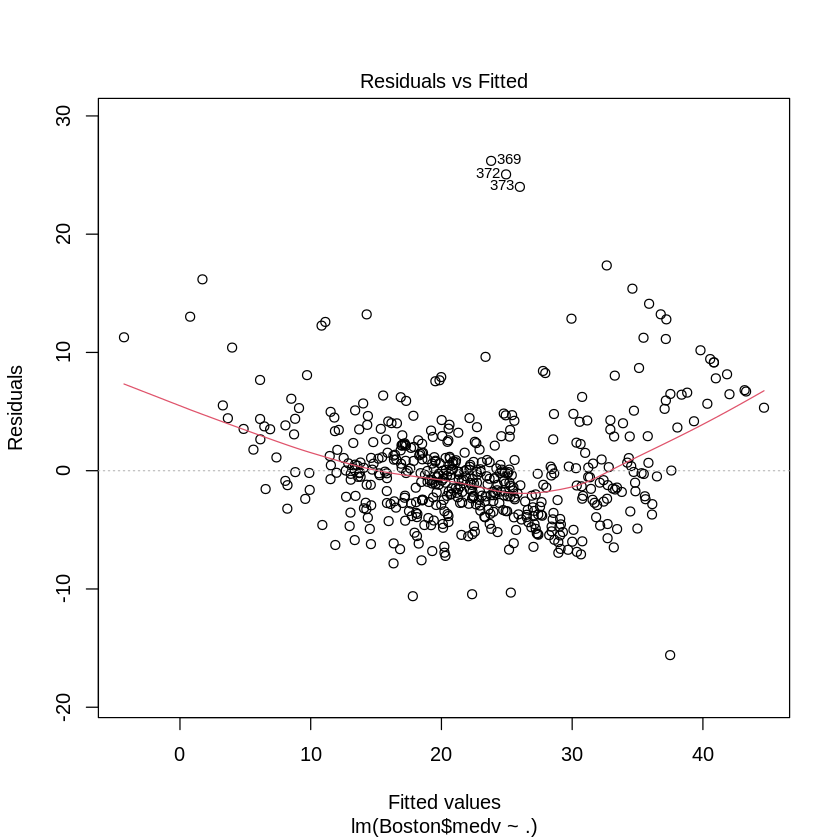

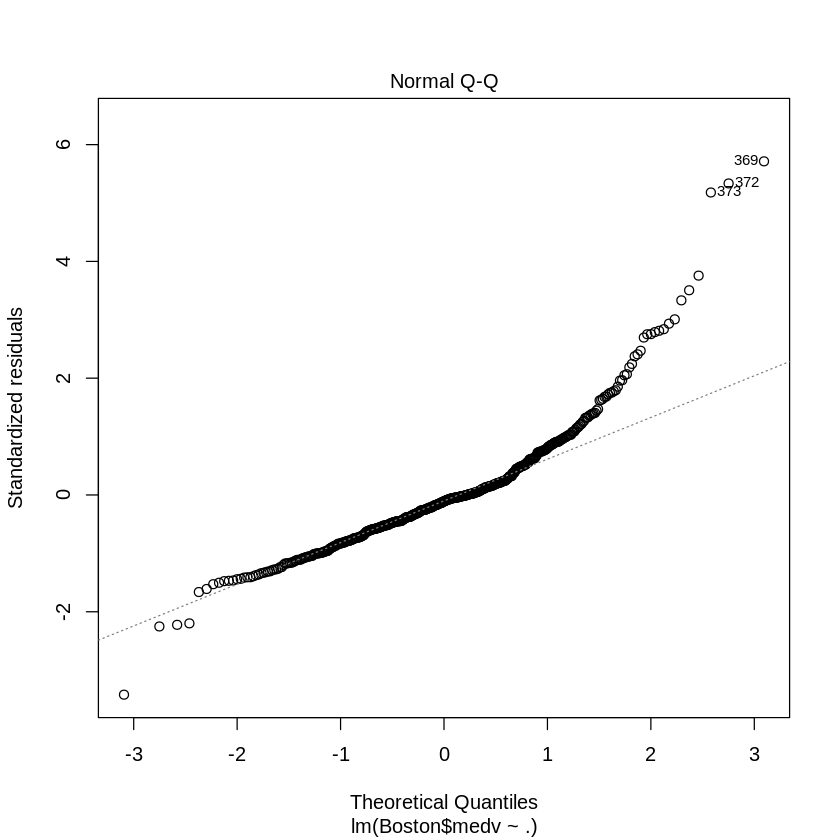

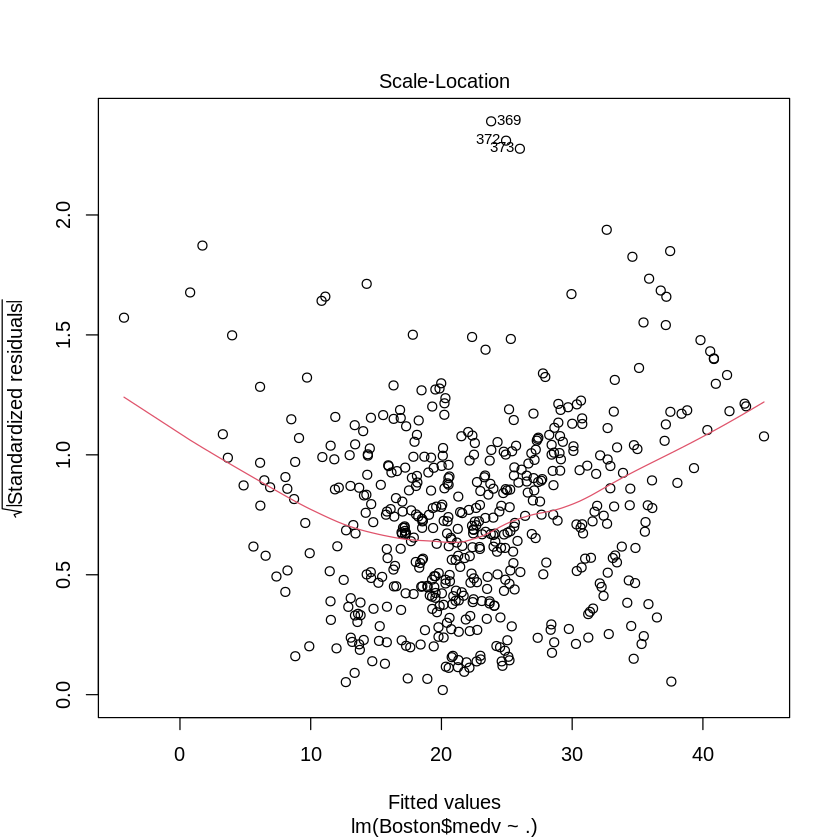

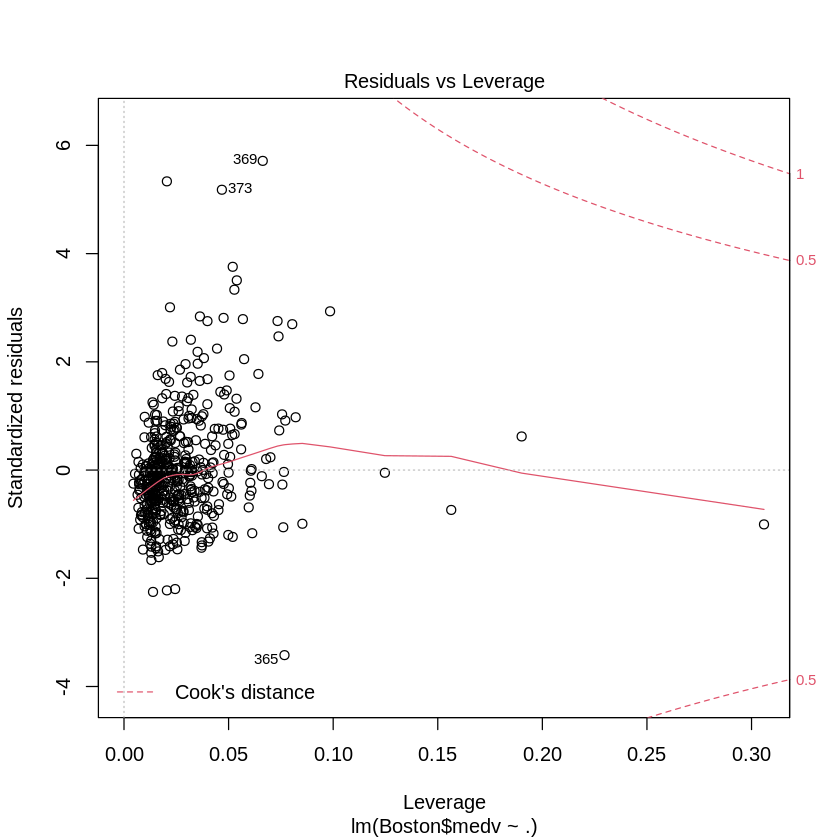

In [38]:
#회귀모형 적합성 평가

mfrow=c(2,2)   #2행 2열짜리로 만든다는 것. 
plot(model5)



Warning message in par(no.randonly = T):
“"no.randonly" is not a graphical parameter”


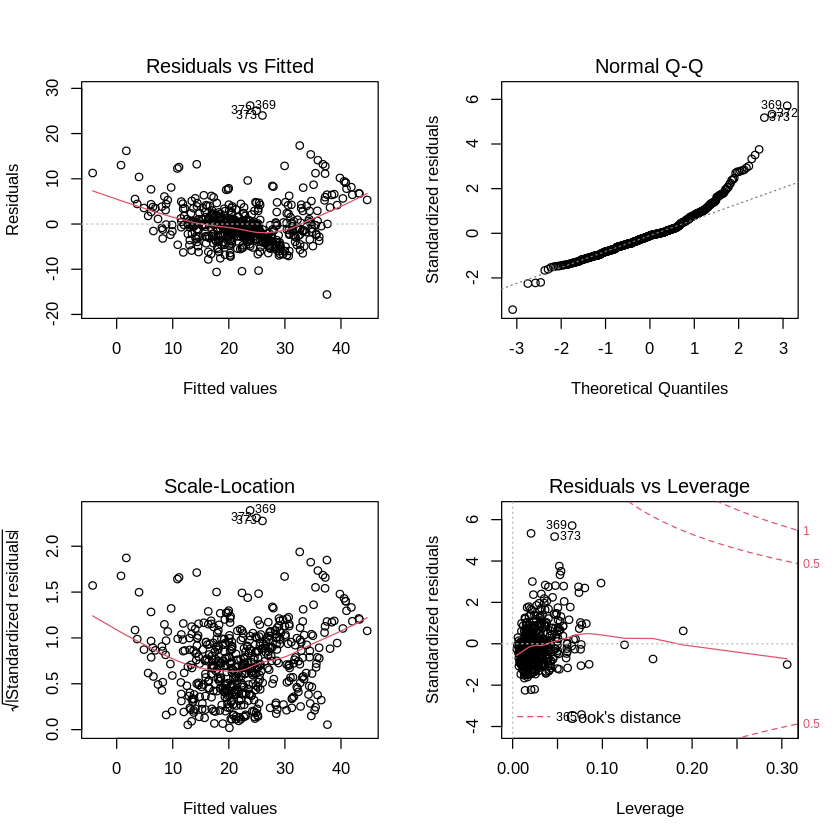

In [39]:
.opar <- par(no.randonly=T)
par(mfrow=c(2,2))
plot(model5)

In [26]:
cor(Boston)

#indus, nox, rm, tax, ptratio, lstat 

이 중에서도 lstat, rm 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00000000,-0.20046922,0.40658341,-0.055891582,0.42097171,-0.21924670,0.35273425,-0.37967009,0.625505145,0.58276431,0.2899456,-0.38506394,0.4556215,-0.3883046
zn,-0.20046922,1.00000000,-0.53382819,-0.042696719,-0.51660371,0.31199059,-0.56953734,0.66440822,-0.311947826,-0.31456332,-0.3916785,0.17552032,-0.4129946,0.3604453
indus,0.40658341,-0.53382819,1.00000000,0.062938027,0.76365145,-0.39167585,0.64477851,-0.70802699,0.595129275,0.72076018,0.3832476,-0.35697654,0.6037997,-0.4837252
chas,-0.05589158,-0.04269672,0.06293803,1.000000000,0.09120281,0.09125123,0.08651777,-0.09917578,-0.007368241,-0.03558652,-0.1215152,0.04878848,-0.0539293,0.1752602
nox,0.42097171,-0.51660371,0.76365145,0.091202807,1.00000000,-0.30218819,0.73147010,-0.76923011,0.611440563,0.66802320,0.1889327,-0.38005064,0.5908789,-0.4273208
rm,-0.21924670,0.31199059,-0.39167585,0.091251225,-0.30218819,1.00000000,-0.24026493,0.20524621,-0.209846668,-0.29204783,-0.3555015,0.12806864,-0.6138083,0.6953599
age,0.35273425,-0.56953734,0.64477851,0.086517774,0.73147010,-0.24026493,1.00000000,-0.74788054,0.456022452,0.50645559,0.2615150,-0.27353398,0.6023385,-0.3769546
dis,-0.37967009,0.66440822,-0.70802699,-0.099175780,-0.76923011,0.20524621,-0.74788054,1.00000000,-0.494587930,-0.53443158,-0.2324705,0.29151167,-0.4969958,0.2499287
rad,0.62550515,-0.31194783,0.59512927,-0.007368241,0.61144056,-0.20984667,0.45602245,-0.49458793,1.000000000,0.91022819,0.4647412,-0.44441282,0.4886763,-0.3816262
tax,0.58276431,-0.31456332,0.72076018,-0.035586518,0.66802320,-0.29204783,0.50645559,-0.53443158,0.910228189,1.00000000,0.4608530,-0.44180801,0.5439934,-0.4685359


In [27]:
attach(Boston)

lm(Boston$medv~lstat + rm)



Call:
lm(formula = Boston$medv ~ lstat + rm)

Coefficients:
(Intercept)        lstat           rm  
    -1.3583      -0.6424       5.0948  


In [29]:
step(lm(medv~., data=Boston), direction='backward')

vif(medv~  crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat, data=Boston)

Start:  AIC=1589.64
medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

          Df Sum of Sq   RSS    AIC
- age      1      0.06 11079 1587.7
- indus    1      2.52 11081 1587.8
<none>                 11079 1589.6
- chas     1    218.97 11298 1597.5
- tax      1    242.26 11321 1598.6
- crim     1    243.22 11322 1598.6
- zn       1    257.49 11336 1599.3
- black    1    270.63 11349 1599.8
- rad      1    479.15 11558 1609.1
- nox      1    487.16 11566 1609.4
- ptratio  1   1194.23 12273 1639.4
- dis      1   1232.41 12311 1641.0
- rm       1   1871.32 12950 1666.6
- lstat    1   2410.84 13490 1687.3

Step:  AIC=1587.65
medv ~ crim + zn + indus + chas + nox + rm + dis + rad + tax + 
    ptratio + black + lstat

          Df Sum of Sq   RSS    AIC
- indus    1      2.52 11081 1585.8
<none>                 11079 1587.7
- chas     1    219.91 11299 1595.6
- tax      1    242.24 11321 1596.6
- crim     1    243.20 11322 1596.6
- zn       1


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Coefficients:
(Intercept)         crim           zn         chas          nox           rm  
  36.341145    -0.108413     0.045845     2.718716   -17.376023     3.801579  
        dis          rad          tax      ptratio        black        lstat  
  -1.492711     0.299608    -0.011778    -0.946525     0.009291    -0.522553  


ERROR: ignored

In [81]:
# 자동차 부품도매상 관리자는 각 지역의 연매출액을 추정하려 함. 
#지역내 아웃렛수, 차량등록수, 개인총소득, 자동차 사용년수, 매니저 수 등이 총매출에 
#어떤 영향을 주는지 회귀분석을 실시하시오(carparts.txt)


car <- read.csv('https://raw.githubusercontent.com/yejin2020/r_statistics/master/datasets/carparts.txt', header=T, sep='\t')
car


ERROR: ignored

In [84]:

car$outlet <- as.integer(gsub(",","",car$outlet))

is.numeric(car$outlet)

[1] TRUE

,sales,outlet,users,income,year,manager
sales,1.0000000,0.8994630,0.6047605,0.9644733,-0.3226640,0.2857628
outlet,0.8994630,1.0000000,0.7747730,0.8250792,-0.4890116,0.1827535
users,0.6047605,0.7747730,1.0000000,0.4087821,-0.4465127,0.3950706
income,0.9644733,0.8250792,0.4087821,1.0000000,-0.3494933,0.1546061
year,-0.3226640,-0.4890116,-0.4465127,-0.3494933,1.0000000,0.2906689
manager,0.2857628,0.1827535,0.3950706,0.1546061,0.2906689,1.0000000


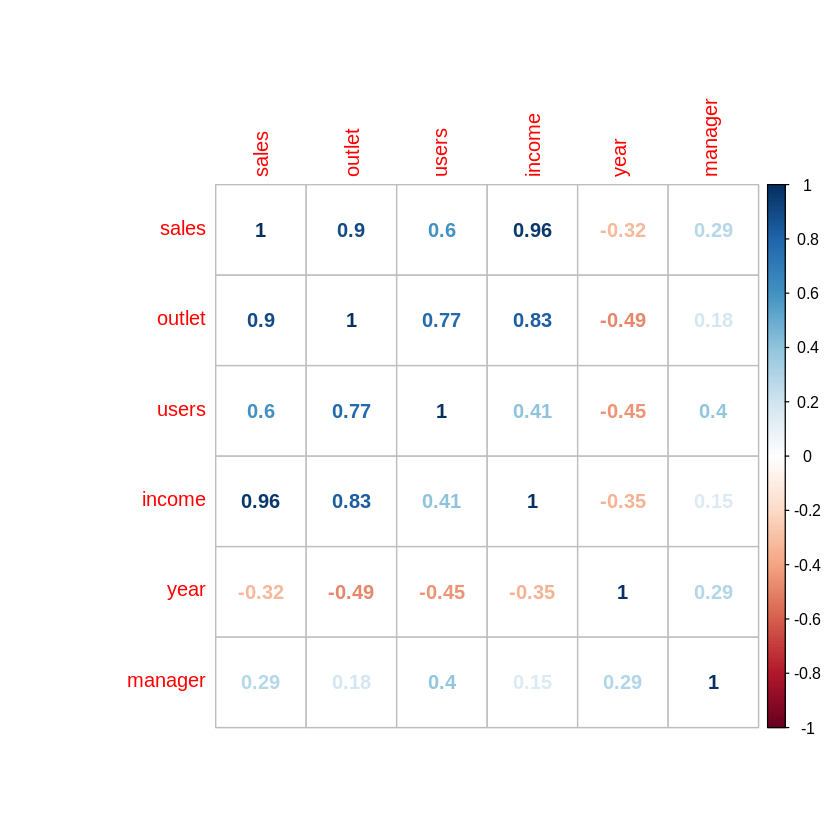

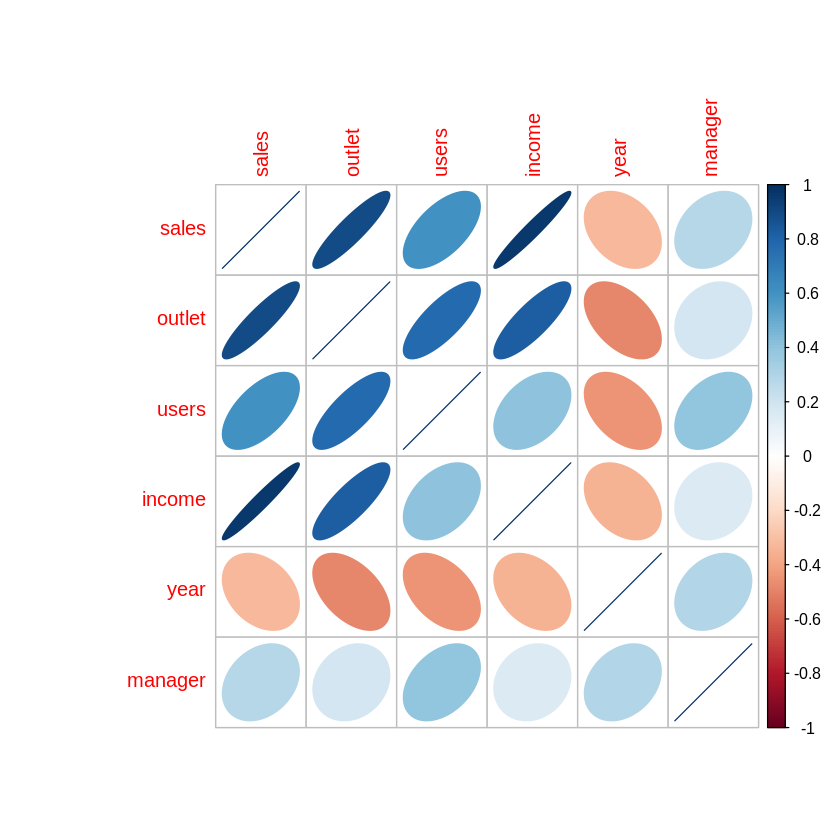

In [90]:
cor(car)


cp<- cor(car)
corrplot(cp, method='number')
corrplot(cp, method='ellipse')


In [89]:
model6 <- lm(sales~.,data=car)
summary(model6)  #0.9873 

model7 <- lm(sales~ users + income, data=car)
summary(model7)  #0.9787 




Call:
lm(formula = sales ~ ., data = car)

Residuals:
       1        2        3        4        5        6        7        8 
 0.51354 -0.44897  0.92578  0.47742 -0.69353 -0.07153 -1.49467 -1.30426 
       9       10 
 1.72412  0.37211 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.968e+01  5.423e+00  -3.629 0.022189 *  
outlet      -6.321e-04  2.636e-03  -0.240 0.822241    
users        1.741e+00  5.526e-01   3.150 0.034519 *  
income       4.100e-01  4.385e-02   9.351 0.000728 ***
year         2.036e+00  8.780e-01   2.319 0.081211 .  
manager     -3.466e-02  1.881e-01  -0.184 0.862813    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.507 on 4 degrees of freedom
Multiple R-squared:  0.9943,	Adjusted R-squared:  0.9873 
F-statistic: 140.4 on 5 and 4 DF,  p-value: 0.0001397



Call:
lm(formula = sales ~ users + income, data = car)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9842 -1.4566  0.0324  0.8099  3.5757 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.75338    2.31131  -3.355  0.01217 *  
users        1.37693    0.29063   4.738  0.00211 ** 
income       0.38954    0.02413  16.143 8.51e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.949 on 7 degrees of freedom
Multiple R-squared:  0.9834,	Adjusted R-squared:  0.9787 
F-statistic: 207.5 on 2 and 7 DF,  p-value: 5.882e-07
